In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install "pandas>=2.0.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Prepare data

In [5]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display
import seaborn as sns
import squarify
import matplotlib
import matplotlib.font_manager as fm
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')   # The 'seaborn' style is deprecated

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"IPython {IPython.__version__}" )
print( f"Matplotlib {mpl.__version__}" )

Python 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
Pandas 2.0.2
NumPy 1.22.4
IPython 7.34.0
Matplotlib 3.7.1


In [109]:
df_bank= pd.read_csv("BankChurners_data.csv")
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [10]:
df_bank.head(5)


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  Naive_Bayes1  Naive_Bayes2  
0                  0.061      0.000093       0.99991  
1                  0.105      0.000057       0.99994  
2                  0.000      0.000021       0.99998  
3                  0.760      0.000134       0.99987  
4                  0.000      0.000022       0.99998  

[5 rows x 23 columns]

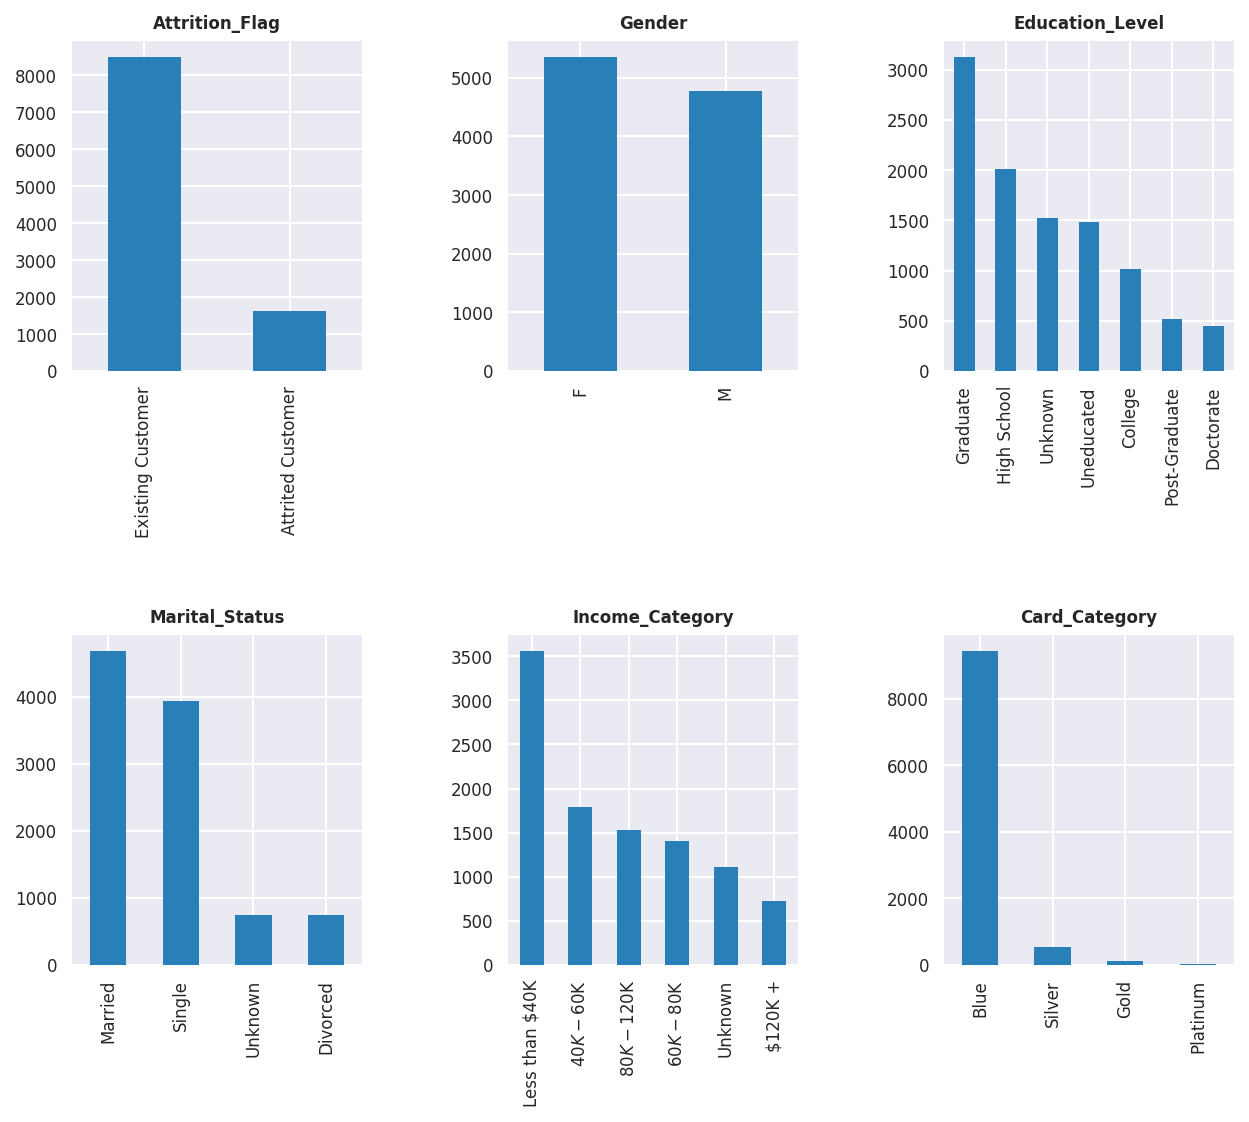

In [116]:
#categorical
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 8),dpi=150)
fig.subplots_adjust(hspace=0.8, wspace=0.5)

cat_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for i, col in enumerate(cat_cols):
    ax = fig.add_subplot(2, 3, i+1)
    cat_count = df_bank[col].value_counts()
    cat_count.plot(kind='bar', ax=ax, color='#2980B9')
    ax.set_title(col,fontweight='bold',fontsize=8)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xticklabels(cat_count.index, rotation=90,fontsize=8)
    ax.tick_params(axis='y', labelsize=8)


plt.show()

In [ ]:
#Check Unknow -- Unknown data (Education_Level, Marital_Status, Income_Category)
x1 = df_bank['Attrition_Flag'].value_counts()
print(x1)

print('\n---Unknown Education----------')
query = (df_bank['Education_Level'] == 'Unknown')
x2 = df_bank[query]['Attrition_Flag'].value_counts()
print(x2)

print('\n---Unknown Marital_Status----------')
c = df_bank['Marital_Status'].value_counts()
print(c)
query = (df_bank['Marital_Status'] == 'Unknown')
x3 = df_bank[query]['Attrition_Flag'].value_counts()
print(x3)

print('\n---Unknown Income----------')
query = (df_bank['Income_Category'] == 'Unknown')
x4 = df_bank[query]['Attrition_Flag'].value_counts()
print(x4)

print('\n---Card Category----------')
df_bank.groupby(['Card_Category'])['Attrition_Flag'].value_counts()
x5 = df_bank['Card_Category'].value_counts()
print(x5)

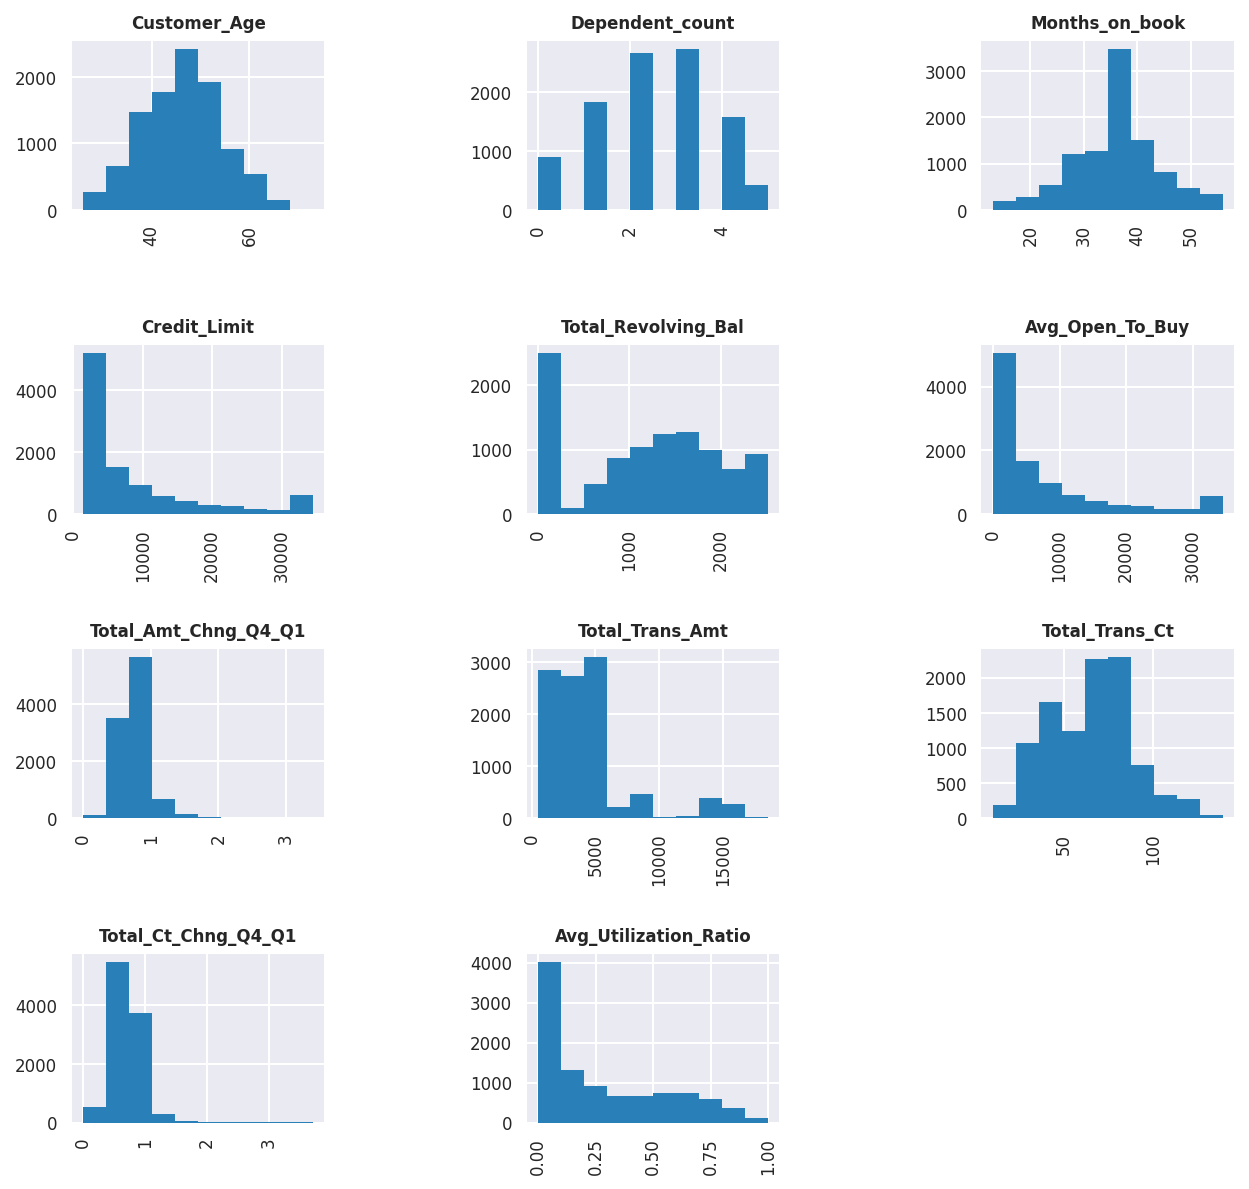

In [117]:
# Numerical

fig = plt.figure(figsize=(10, 12),dpi=150)
fig.subplots_adjust(hspace=0.8, wspace=0.8)

num_col = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal',
           'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
           'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

for i, col in enumerate(num_col):
    ax = fig.add_subplot(5, 3, i+1)
    ax.hist(df_bank[col], color='#2980B9' )
    ax.set_title(col,fontweight='bold',fontsize=8)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.tick_params(axis='both', labelsize=8)
    ax.xaxis.set_tick_params(rotation=90)

plt.show()


In [11]:
#Select the desired columns from df_bank
selected_columns = ['CLIENTNUM', 'Months_on_book', 'Total_Trans_Ct', 'Total_Trans_Amt']
selected_data = df_bank[selected_columns]

display(selected_data.head(5))

CLIENTNUM  Months_on_book  Total_Trans_Ct  Total_Trans_Amt
0  768805383              39              42             1144
1  818770008              44              33             1291
2  713982108              36              20             1887
3  769911858              34              20             1171
4  709106358              21              28              816

In [107]:
#Set Percentile
df_bank['percentile_R'] = df_bank['Months_on_book'].rank(pct=True)
df_bank['rank_R'] = pd.cut(df_bank['percentile_R'], bins=5, labels=[1, 2, 3, 4, 5])

df_bank['percentile_F'] = df_bank['Total_Trans_Ct'].rank(pct=True)
df_bank['rank_F'] = pd.cut(df_bank['percentile_F'], bins=5, labels=[1, 2, 3, 4, 5])

df_bank['percentile_M'] = df_bank['Total_Trans_Amt'].rank(pct=True)
df_bank['rank_M'] = pd.cut(df_bank['percentile_M'], bins=5, labels=[1, 2, 3, 4, 5])

df_bank['type'] = df_bank.apply(lambda x : str(x['rank_R']) + str(x['rank_F']) + str(x['rank_M']) ,axis = 1)

df_bank

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  percentile_R  rank_R  percentile_F  rank_F  \
0                  39  ...      0.705145       4      0.211563       2   
1                  44  ...      0.849264       5      0.094845       1   
2                  36  ...      0.497087       3      0.010862       1   
3                  34  ...      0.326750       2      0.010862       1   
4                  21  ...      0.041967       1      0.049669       1   
...               ...  ...           ...     ...           ...     ...   
10122              40  ...      0.738422       4      0.977585       5   
10123              25  ...      0.091834       1      0.532685       3   
10124              36  ...      0.497087       3      0.394194       2   
10125              36  ...      0.497087       3      0.417942       3   
10126              25  ...      0.091834       1      0.405500       3   

       percentile_M  rank_M  type    Generation  Attrition_Encoded  \
0          0.027698       1   421  Generation X                  0   
1          0.051595       1   511  Generation X                  0   
2          0.193098       1   311  Generation X                  0   
3          0.030907       1   211  Generation Y                  0   
4          0.007307       1   111  Generation Y                  0   
...             ...     ...   ...           ...                ...   
10122      0.983411       5   455  Generation X                  0   
10123      0.914881       5   135  Generation Y                  1   
10124      0.925842       5   325  Generation X                  1   
10125      0.905698       5   335  Generation Y                  1   
10126      0.925941       5   135  Generation X                  1   

         Attrition_Label  
0      Existing Customer  
1      Existing Customer  
2      Existing Customer  
3      Existing Customer  
4      Existing Customer  
...                  ...  
10122  Existing Customer  
10123  Attrited Customer  
10124  Attrited Customer  
10125  Attrited Customer  
10126  Attrited Customer  

[10127 rows x 33 columns]

In [15]:
df_seg = pd.read_csv("segment.csv", sep=',', encoding='latin-1')
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RFM            125 non-null    int64 
 1   Segment        125 non-null    object
 2   No             125 non-null    int64 
 3   Group Segment  125 non-null    object
dtypes: int64(2), object(2)
memory usage: 4.0+ KB


In [16]:
df_bank['type'] = df_bank['type'].astype(int)

result = pd.merge(df_bank, df_seg, left_on='type', right_on='RFM', how='inner')
result

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      785387883  Existing Customer            47      F                3   
2      780466533  Existing Customer            54      M                3   
3      799224108  Existing Customer            46      F                4   
4      709122483  Existing Customer            56      M                3   
...          ...                ...           ...    ...              ...   
10122  713003358  Attrited Customer            40      M                3   
10123  812247033  Attrited Customer            51      F                3   
10124  710161083  Attrited Customer            62      F                0   
10125  711826983  Attrited Customer            47      F                3   
10126  718376583  Attrited Customer            52      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1         High School         Single     $40K - $60K          Blue   
2           Doctorate        Married         $120K +          Blue   
3            Graduate         Single  Less than $40K          Blue   
4            Graduate        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single    $80K - $120K          Blue   
10123      Uneducated        Married  Less than $40K          Blue   
10124      Uneducated         Single  Less than $40K          Blue   
10125         Unknown        Married     $40K - $60K          Blue   
10126        Graduate       Divorced    $80K - $120K        Silver   

       Months_on_book  ...  rank_R  percentile_F  rank_F  percentile_M  \
0                  39  ...       4      0.211563       2      0.027698   
1                  41  ...       4      0.273181       2      0.124173   
2                  41  ...       4      0.321171       2      0.189790   
3                  40  ...       4      0.225338       2      0.150834   
4                  37  ...       4      0.337119       2      0.198479   
...               ...  ...     ...           ...     ...           ...   
10122              30  ...       2      0.184704       1      0.810408   
10123              46  ...       5      0.171769       1      0.407673   
10124              36  ...       3      0.184704       1      0.858102   
10125              36  ...       3      0.158685       1      0.403673   
10126              44  ...       5      0.184704       1      0.856028   

       rank_M  type  RFM            Segment  No        Group Segment  
0           1   421  421     About to sleep   7     7.About to sleep  
1           1   421  421     About to sleep   7     7.About to sleep  
2           1   421  421     About to sleep   7     7.About to sleep  
3           1   421  421     About to sleep   7     7.About to sleep  
4           1   421  421     About to sleep   7     7.About to sleep  
...       ...   ...  ...                ...  ..                  ...  
10122       5   215  215          Promising   5          5.Promising  
10123       3   513  513  Can not lose them   9  9.Can not lose them  
10124       5   315  315          Promising   5          5.Promising  
10125       3   313  313          Promising   5          5.Promising  
10126       5   515  515  Can not lose them   9  9.Can not lose them  

[10127 rows x 34 columns]

In [17]:
import pandas as pd

# Select the desired columns from the 'result' DataFrame
selected_columns = ['CLIENTNUM', 'Months_on_book', 'Total_Trans_Ct', 'Total_Trans_Amt', 'rank_R', 'rank_F', 'rank_M']
selected_data = result[selected_columns]

# Display the selected columns as a table
display(pd.DataFrame(selected_data.head(10)))

CLIENTNUM  Months_on_book  Total_Trans_Ct  Total_Trans_Amt rank_R rank_F  \
0  768805383              39              42             1144      4      2   
1  785387883              41              47             1594      4      2   
2  780466533              41              52             1873      4      2   
3  799224108              40              43             1715      4      2   
4  709122483              37              54             1909      4      2   
5  778465533              40              51             1885      4      2   
6  808964433              41              45             1594      4      2   
7  816596583              40              50             1749      4      2   
8  716999883              41              43             1405      4      2   
9  720923658              39              45             1570      4      2   

  rank_M  
0      1  
1      1  
2      1  
3      1  
4      1  
5      1  
6      1  
7      1  
8      1  
9      1

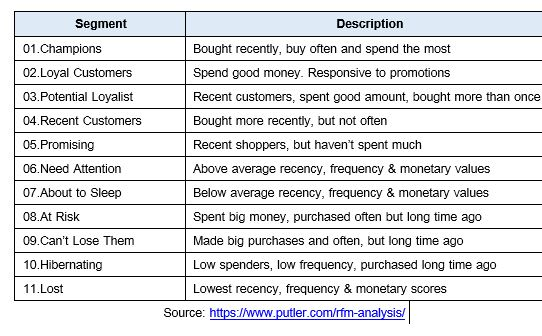

### Model RFM

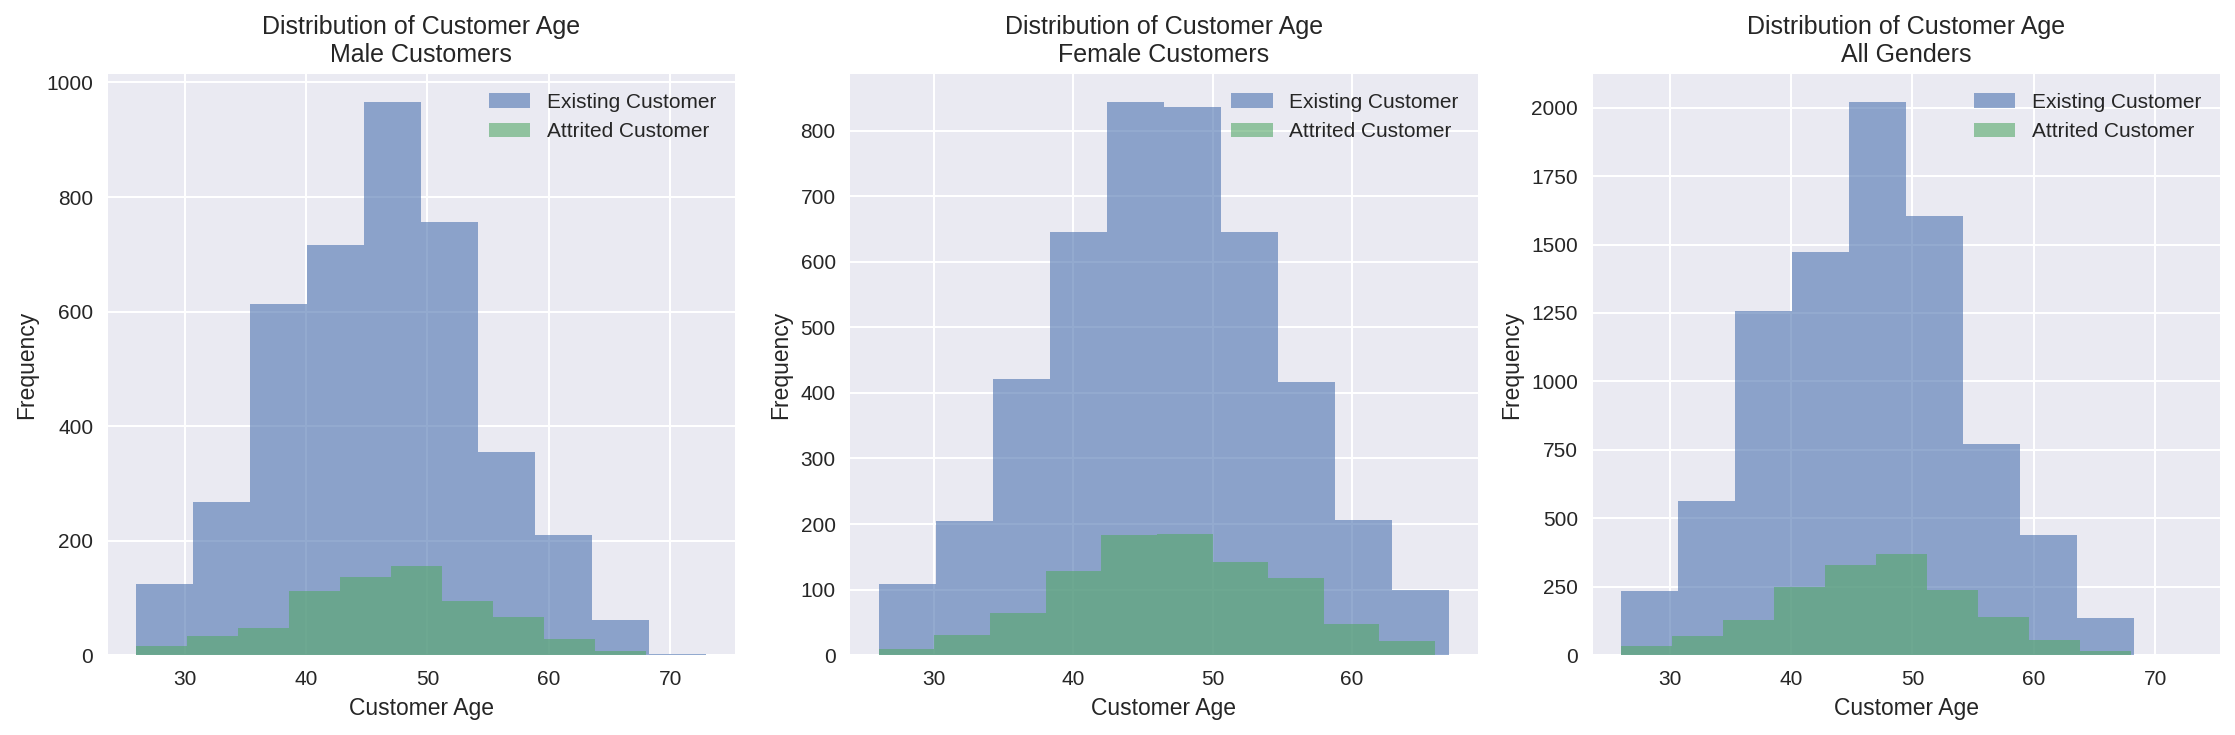

In [18]:
# Filter the data based on attrition
df_male_existing = df_bank[(df_bank['Attrition_Flag'] == 'Existing Customer') & (df_bank['Gender'] == 'M')]
df_male_attrited = df_bank[(df_bank['Attrition_Flag'] == 'Attrited Customer') & (df_bank['Gender'] == 'M')]
df_female_existing = df_bank[(df_bank['Attrition_Flag'] == 'Existing Customer') & (df_bank['Gender'] == 'F')]
df_female_attrited = df_bank[(df_bank['Attrition_Flag'] == 'Attrited Customer') & (df_bank['Gender'] == 'F')]
df_existing = df_bank[(df_bank['Attrition_Flag'] == 'Existing Customer') ]
df_attrited = df_bank[(df_bank['Attrition_Flag'] == 'Attrited Customer') ]

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=150)

# Histogram 1: Male - Existing and Attrited Customers
ax1.hist(df_male_existing['Customer_Age'], bins=10, alpha=0.6, label='Existing Customer')
ax1.hist(df_male_attrited['Customer_Age'], bins=10, alpha=0.6, label='Attrited Customer')
ax1.set_xlabel('Customer Age')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Customer Age\nMale Customers')
ax1.legend()

# Histogram 2: Female - Existing and Attrited Customers
ax2.hist(df_female_existing['Customer_Age'], bins=10, alpha=0.6, label='Existing Customer')
ax2.hist(df_female_attrited['Customer_Age'], bins=10, alpha=0.6, label='Attrited Customer')
ax2.set_xlabel('Customer Age')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Customer Age\nFemale Customers')
ax2.legend()

# Histogram 3: All Genders - Existing and Attrited Customers
ax3.hist(df_existing['Customer_Age'], bins=10, alpha=0.6, label='Existing Customer')
ax3.hist(df_attrited['Customer_Age'], bins=10, alpha=0.6, label='Attrited Customer')
ax3.set_xlabel('Customer Age')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Customer Age\nAll Genders')
ax3.legend()

# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


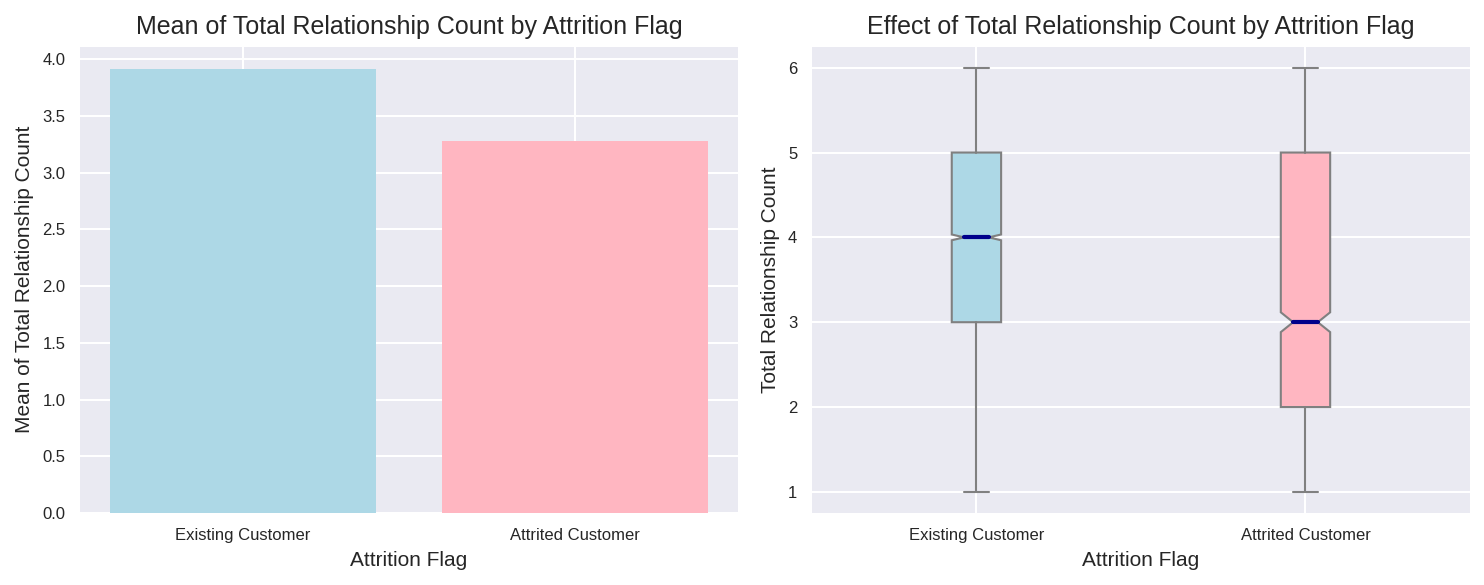

In [19]:
# Filter the data based on attrition
df_existing = df_bank[df_bank['Attrition_Flag'] == 'Existing Customer']
df_attrited = df_bank[df_bank['Attrition_Flag'] == 'Attrited Customer']

# Calculate the mean Total_Relationship_Count for each group
mean_existing = df_existing['Total_Relationship_Count'].mean()
mean_attrited = df_attrited['Total_Relationship_Count'].mean()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=150)

# Grouped bar plot
ax1.bar(['Existing Customer', 'Attrited Customer'], [mean_existing, mean_attrited], color=['lightblue', 'lightpink'])
ax1.set_xlabel('Attrition Flag', fontsize=10)
ax1.set_ylabel('Mean of Total Relationship Count', fontsize=10)
ax1.set_title('Mean of Total Relationship Count by Attrition Flag', fontsize=12)
ax1.tick_params(axis='x', labelrotation=0)
ax1.tick_params(axis='both', labelsize=8)

# Box plot
box_colors = ['lightblue', 'lightpink']
boxes = ax2.boxplot([df_existing['Total_Relationship_Count'], df_attrited['Total_Relationship_Count']],
                    labels=['Existing Customer', 'Attrited Customer'],
                    notch=True,
                    patch_artist=True,
                    boxprops={'facecolor': box_colors[0], 'edgecolor': 'gray'},
                    whiskerprops={'color': 'gray'},
                    capprops={'color': 'gray'},
                    medianprops={'color': 'darkblue', 'linewidth': 2},
                    flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 4}
                    )
for patch, color in zip(boxes['boxes'], box_colors):
    patch.set_facecolor(color)
ax2.set_xlabel('Attrition Flag', fontsize=10)
ax2.set_ylabel('Total Relationship Count', fontsize=10)
ax2.set_title('Effect of Total Relationship Count by Attrition Flag', fontsize=12)
ax2.tick_params(axis='x', labelrotation=0)
ax2.tick_params(axis='both', labelsize=8)

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()




**Add Education**

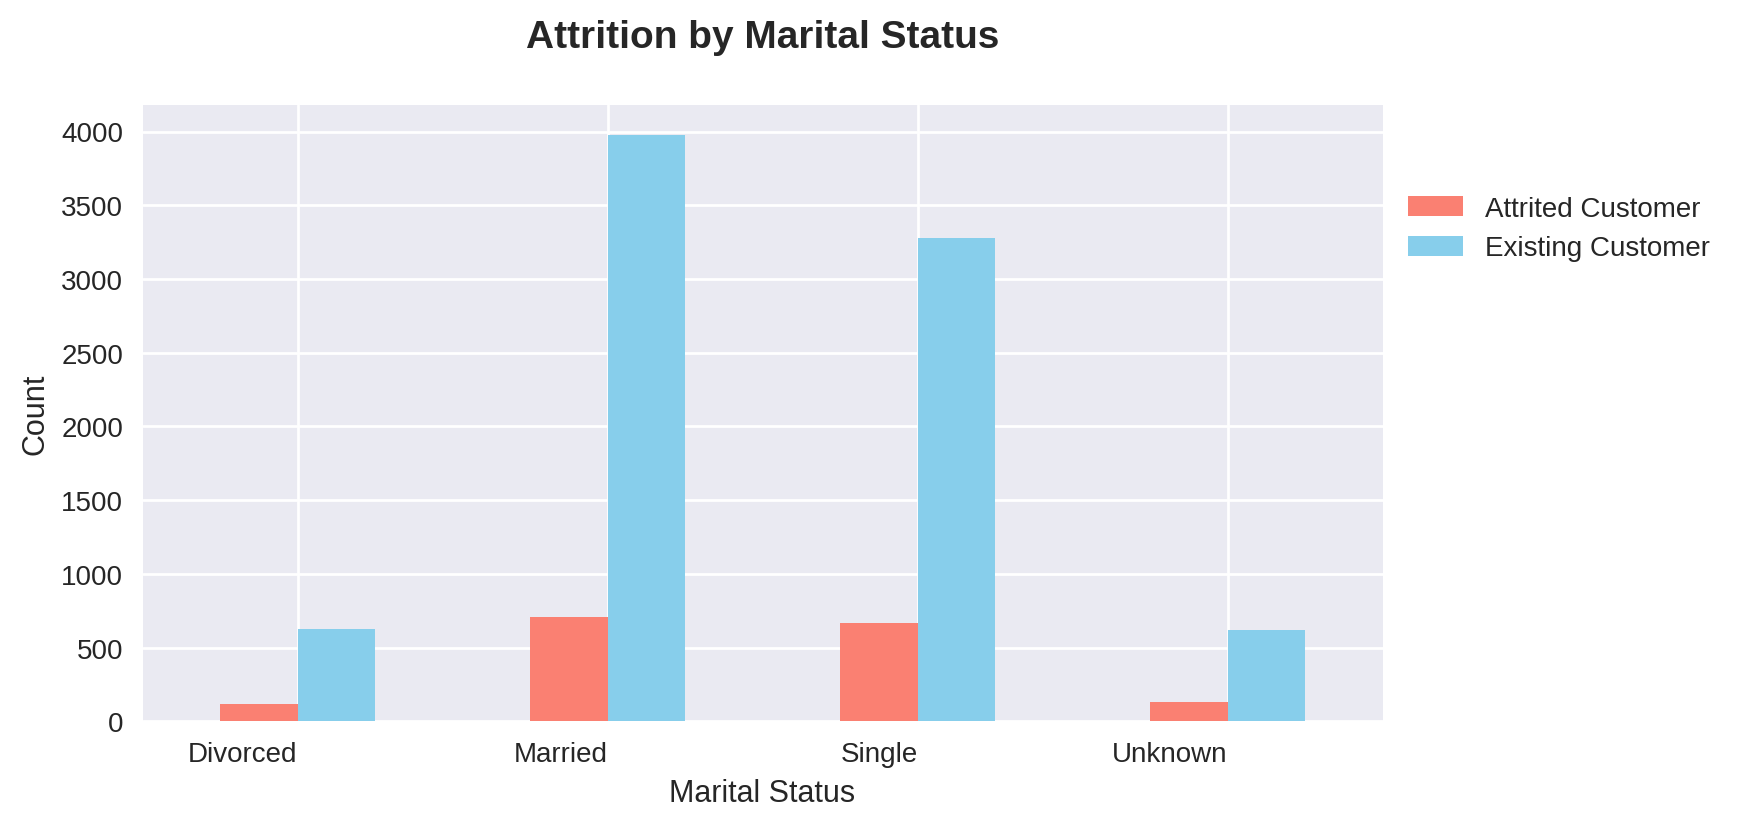

In [20]:
# Group the data by 'Marital_Status' and 'Attrition_Flag' columns
grouped_data = df_bank.groupby(['Marital_Status', 'Attrition_Flag']).size().unstack().fillna(0)

# Plot the bar chart with customized color
colors = ['salmon', 'skyblue']  # Red and blue colors
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)
grouped_data.plot(kind='bar', color=colors, ax=ax)

# Set labels and title
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
ax.set_title('Attrition by Marital Status\n', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Rotating x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

# Moving the legend outside of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

# Show the plot
plt.show()


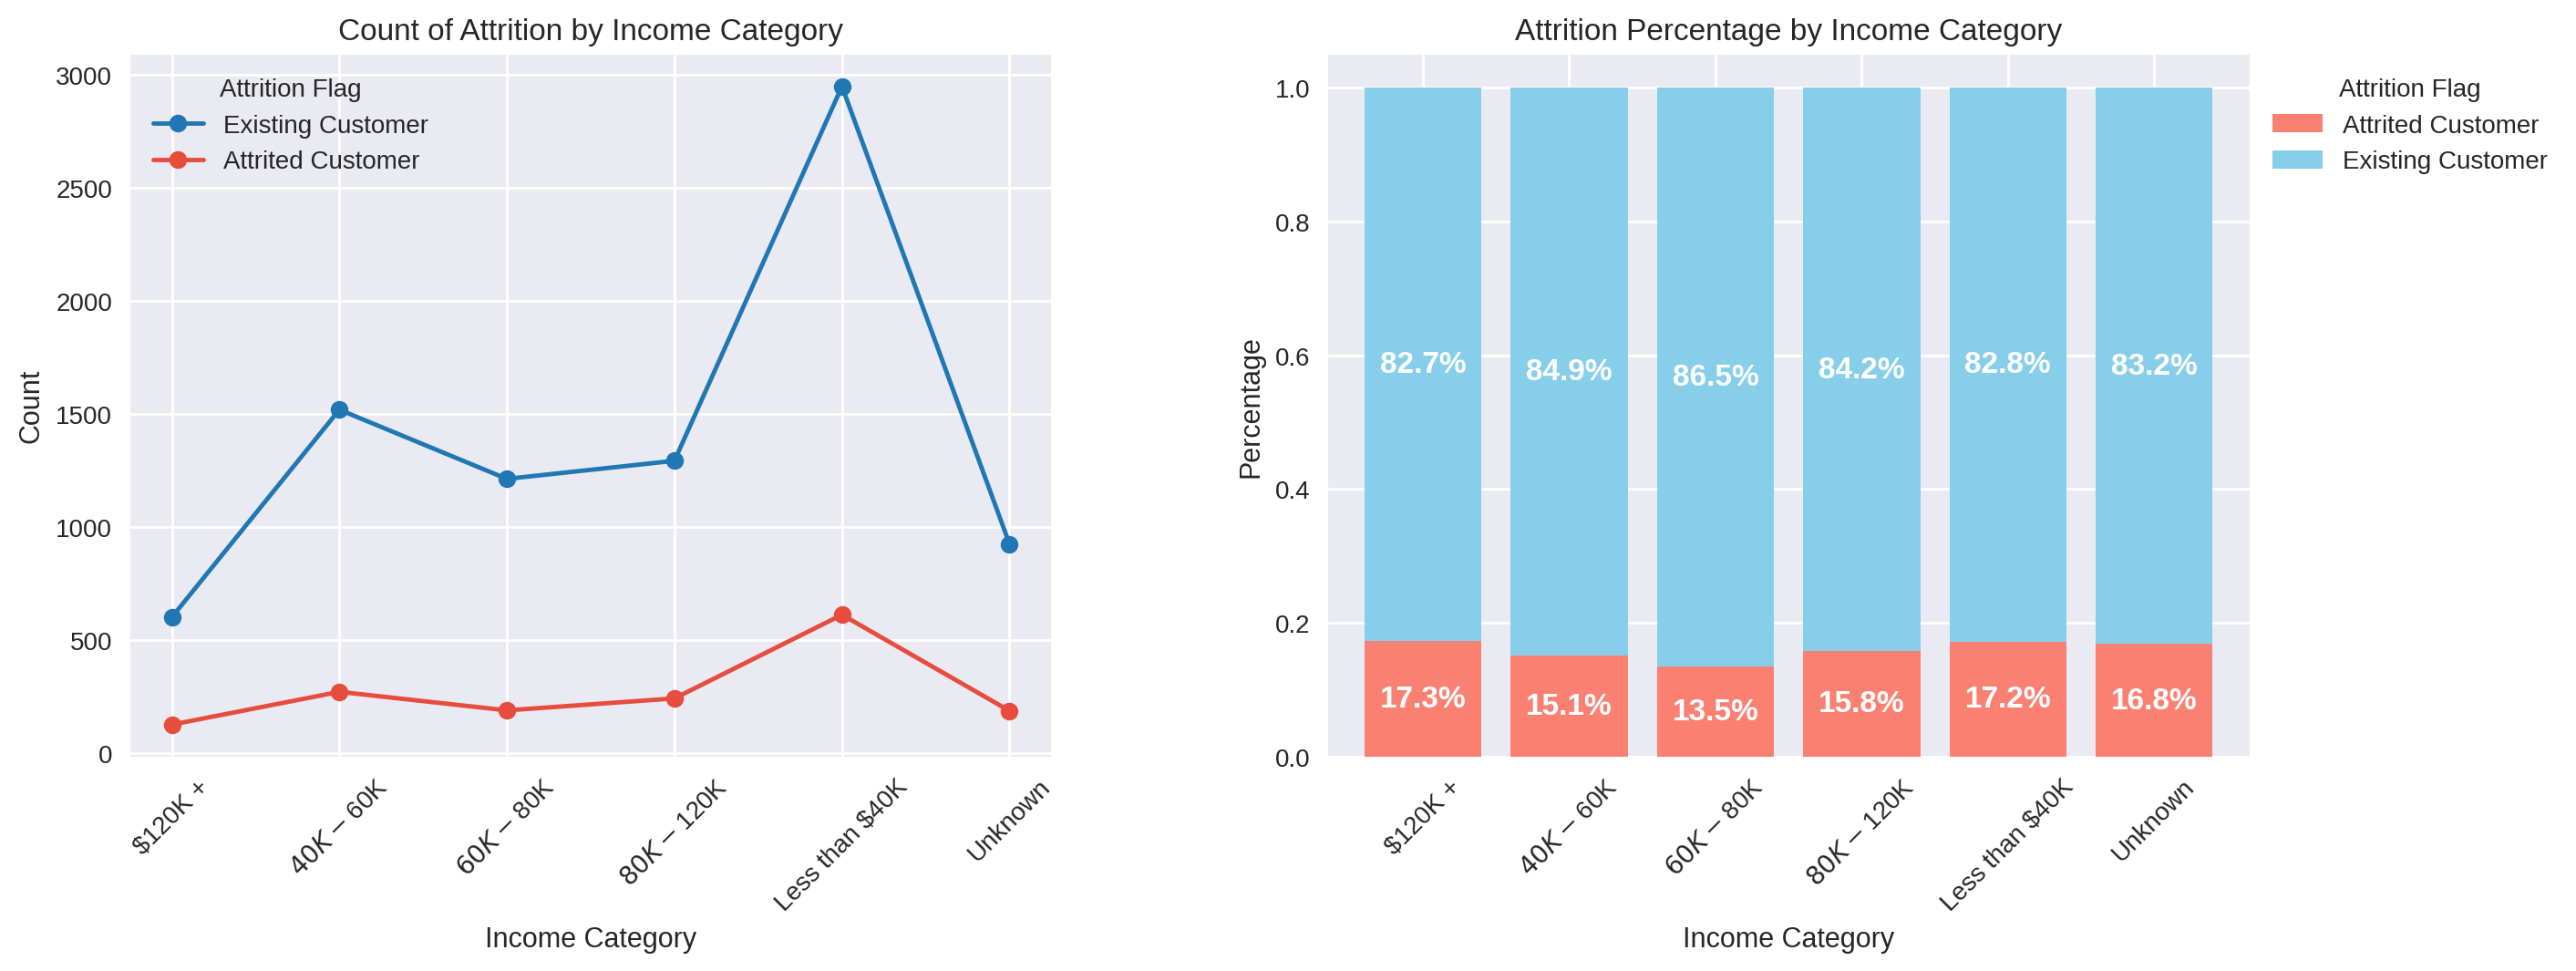

In [21]:
# Group the data by 'Attrition_Flag' and 'Income_Category' and calculate the count
grouped_data = df_bank.groupby(['Attrition_Flag', 'Income_Category']).size().unstack()

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=200)

# Line plot for Existing Customer with the previous blue color
ax1.plot(grouped_data.loc['Existing Customer'], marker='o', color='#1f77b4', label='Existing Customer')

# Line plot for Attrited Customer with pink color
ax1.plot(grouped_data.loc['Attrited Customer'], marker='o', color='#E74C3C', label='Attrited Customer')

# Plot styling for Line plot
ax1.set_xlabel('Income Category')
ax1.set_ylabel('Count')
ax1.set_title('Count of Attrition by Income Category')
ax1.legend(title='Attrition Flag')
ax1.tick_params(axis='x', rotation=45)

# Group the data by 'Income_Category' and 'Attrition_Flag' and calculate the count
grouped_data = df_bank.groupby(['Income_Category', 'Attrition_Flag']).size().unstack()

# Calculate the ratio of Attrition_Flag for each Income_Category
ratio_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# Create a stacked bar plot

colors = ['salmon', 'skyblue']
bars = ratio_data.plot(kind='bar', stacked=True, color=colors, width=0.8, ax=ax2)  # Decrease bar width

# Add percentage labels to the bars
for container in bars.containers:
    for rect in container:
        width = rect.get_width()
        height = rect.get_height()
        x = rect.get_x()
        y = rect.get_y()
        percentage = f'{height:.1%}'
        ax2.annotate(percentage, (x + width / 2, y + height / 2), ha='center', va='center', fontsize=12, fontweight='bold', color='white')

# Plot styling for Stacked bar plot
ax2.set_xlabel('Income Category')
ax2.set_ylabel('Percentage')
ax2.set_title('Attrition Percentage by Income Category')
ax2.legend(title='Attrition Flag', bbox_to_anchor=(1, 1))  # Move legend to the right side
ax2.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
fig.subplots_adjust(wspace=0.3)  # Add horizontal spacing between subplots

# Show the plot
plt.show()


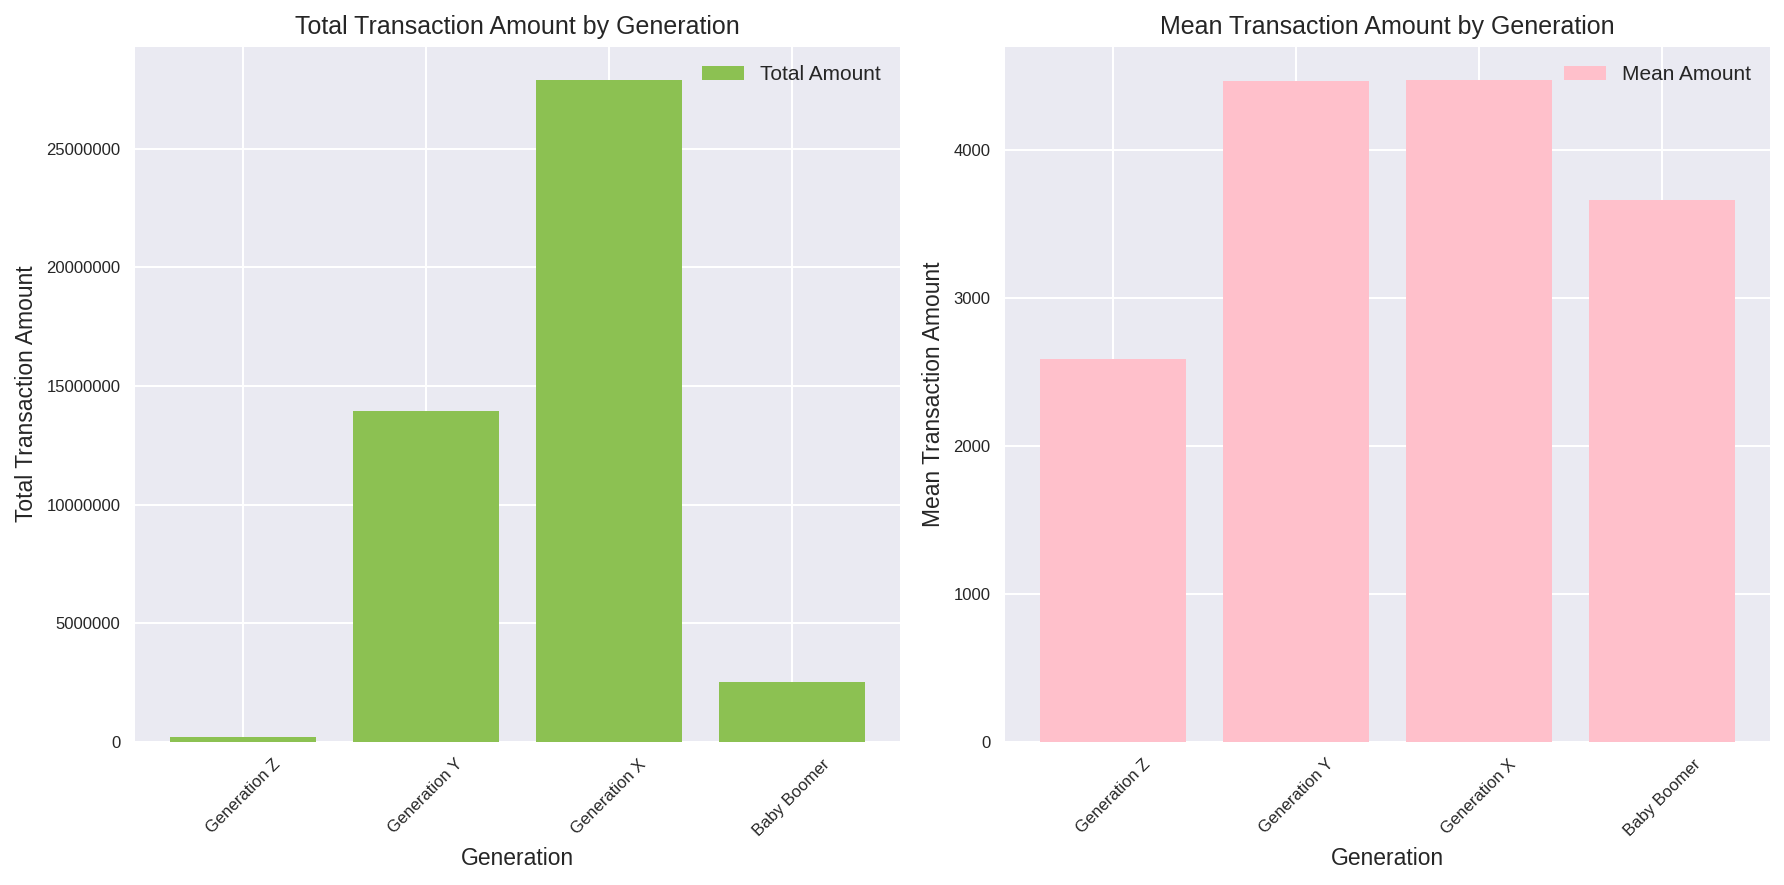

Generation
Generation Z    2586.641026
Generation Y    4469.251921
Generation X    4475.892239
Baby Boomer     3664.465893
Name: Total_Trans_Amt, dtype: float64


In [22]:
# Define the age ranges for each generation
generation_ranges = {
    'Generation Z': (11, 26),
    'Generation Y': (27, 42),
    'Generation X': (43, 58),
    'Baby Boomer': (59, 120)  # Use a large upper bound for the last generation
}

# Create a new column 'Generation' based on the age ranges
df_bank['Generation'] = pd.cut(df_bank['Customer_Age'], bins=[0] + [r[1] for r in generation_ranges.values()], labels=list(generation_ranges.keys()))

# Group the data by 'Generation' and count the number of occurrences
generation_counts = df_bank['Generation'].value_counts().sort_index()

# Group the data by 'Generation' and calculate the sum and mean of 'Total_Trans_Amt'
generation_totals = df_bank.groupby('Generation')['Total_Trans_Amt'].sum()
generation_means = df_bank.groupby('Generation')['Total_Trans_Amt'].mean()

# Create a figure with a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), dpi=150)

# Plot the total transaction amount as a bar plot
axs[0].bar(generation_totals.index, generation_totals.values, color='#8CC152', label='Total Amount')
axs[0].set_ylabel('Total Transaction Amount')

# Plot the mean transaction amount as a bar plot
axs[1].bar(generation_means.index, generation_means.values, color='pink', label='Mean Amount')
axs[1].set_ylabel('Mean Transaction Amount')

# Set the x-axis labels and title for both subplots
axs[0].set_xlabel('Generation')
axs[0].set_title('Total Transaction Amount by Generation')

axs[1].set_xlabel('Generation')
axs[1].set_title('Mean Transaction Amount by Generation')

# Rotate the x-axis labels for better readability
axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)

# Set the tick label font size for both subplots
axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[1].tick_params(axis='both', which='major', labelsize=8)

# Disable scientific notation on y-axis labels for both subplots
axs[0].get_yaxis().get_major_formatter().set_scientific(False)
axs[1].get_yaxis().get_major_formatter().set_scientific(False)

# Add legends for both subplots
axs[0].legend()
axs[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

print(generation_means)

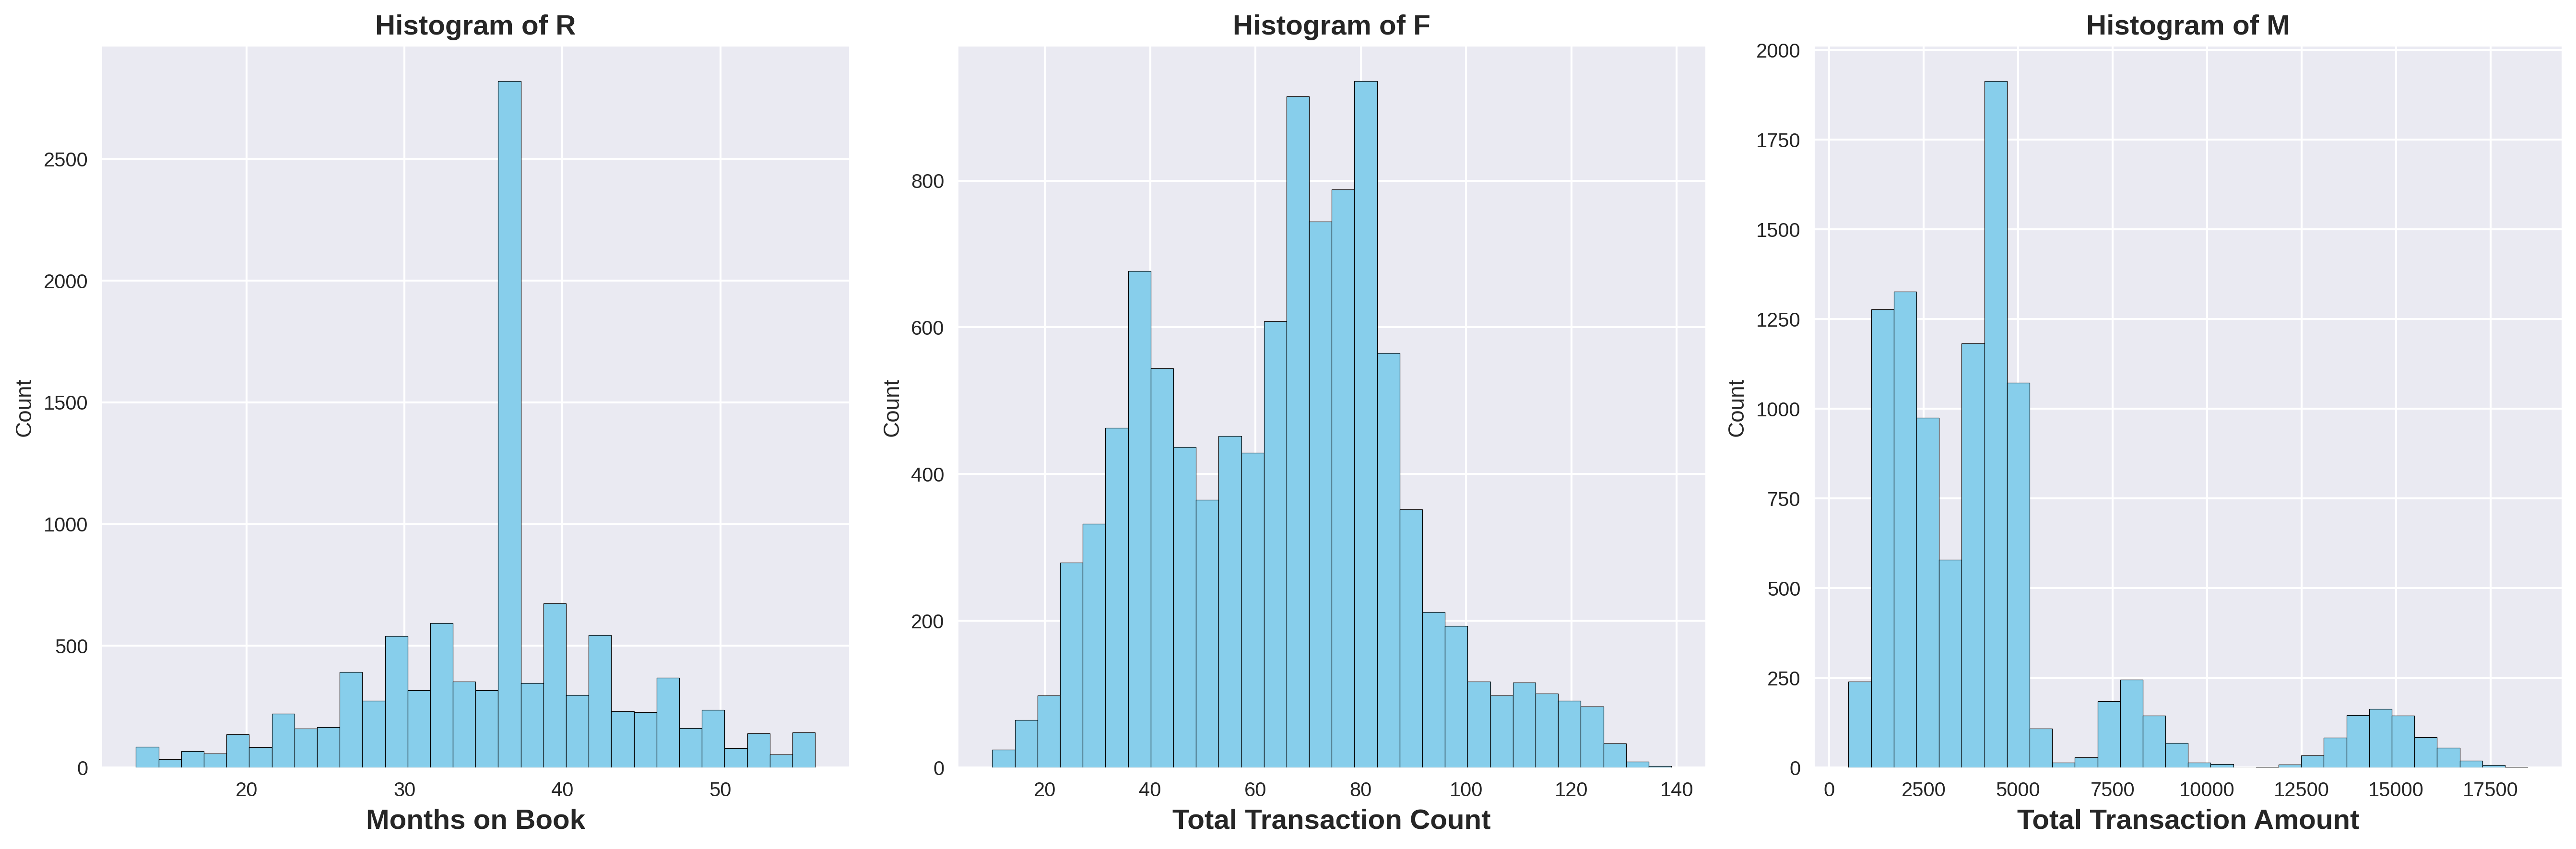

In [23]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), dpi=300)

# Create histograms for each column
axs[0].hist(result['Months_on_book'], bins=30, edgecolor='black', color='skyblue')
axs[1].hist(result['Total_Trans_Ct'], bins=30, edgecolor='black', color='skyblue')
axs[2].hist(result['Total_Trans_Amt'], bins=30, edgecolor='black', color='skyblue')

# Set labels and titles for each subplot
axs[0].set_xlabel('Months on Book', fontweight='bold', fontsize=14)
axs[0].set_ylabel('Count')
axs[0].set_title('Histogram of R', fontweight='bold', fontsize=14)

axs[1].set_xlabel('Total Transaction Count', fontweight='bold', fontsize=14)
axs[1].set_ylabel('Count')
axs[1].set_title('Histogram of F', fontweight='bold', fontsize=14)
axs[2].set_xlabel('Total Transaction Amount', fontweight='bold', fontsize=14)
axs[2].set_ylabel('Count')
axs[2].set_title('Histogram of M', fontweight='bold', fontsize=14)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [24]:

# Define the encoding for Attrition_Flag
encoding = {'Attrited Customer': 1, 'Existing Customer': 0}

# Map the encoding to the Attrition_Flag column
df_bank['Attrition_Encoded'] = df_bank['Attrition_Flag'].map(encoding)

# Select the columns for correlation calculation
columns_for_correlation = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                           'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                           'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                           'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Calculate correlation between selected columns and Attrition_Encoded
correlations = df_bank[columns_for_correlation].corrwith(df_bank['Attrition_Encoded'])
correlations_df = pd.DataFrame({'Attribute': correlations.index, 'Value': correlations.values})

# Sort value
correlations_df = correlations_df.sort_values(by='Value', ascending=False)

# Display the sorted correlations
display(correlations_df)


Attribute     Value
5      Contacts_Count_12_mon  0.204491
4     Months_Inactive_12_mon  0.152449
1            Dependent_count  0.018991
0               Customer_Age  0.018203
2             Months_on_book  0.013687
8            Avg_Open_To_Buy -0.000285
6               Credit_Limit -0.023873
9       Total_Amt_Chng_Q4_Q1 -0.131063
3   Total_Relationship_Count -0.150005
10           Total_Trans_Amt -0.168598
13     Avg_Utilization_Ratio -0.178410
7        Total_Revolving_Bal -0.263053
12       Total_Ct_Chng_Q4_Q1 -0.290054
11            Total_Trans_Ct -0.371403

In [25]:
df_grouped = result.groupby(by=['No','Segment'])['CLIENTNUM'].count().reset_index()
df_grouped.sort_values(by='No', ascending=True)
df_grouped.rename(columns={'CLIENTNUM':'Count_Customer'}, inplace=True)
display(df_grouped)

No             Segment  Count_Customer
0    1           Champions             988
1    2     Loyal Customers            1152
2    3  Potential loyalist             988
3    4    Recent customers            1329
4    5           Promising             479
5    6      Need Attention             763
6    7      About to sleep             295
7    8             At risk            1528
8    9   Can not lose them             541
9   10         Hibernating            1385
10  11                Lost             679

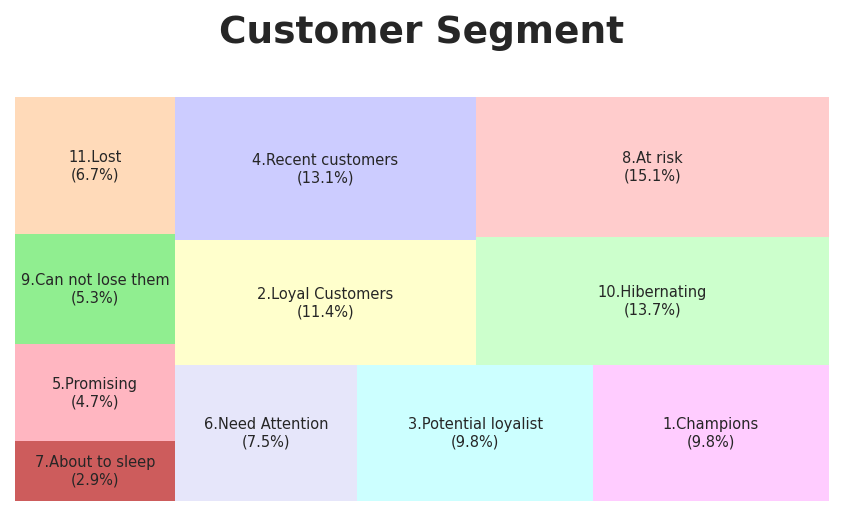

In [26]:
grouped = result.groupby('Group Segment')
count_values = grouped['CLIENTNUM'].count().to_frame()
# Set the font family
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
plt.figure(figsize=(7,3.5), dpi=150)

# Sort the values in descending order
sorted_values = count_values['CLIENTNUM'].sort_values(ascending=False)

# Define the sizes for the treemap in reverse order
sizes = sorted_values.values[::-1]

# Calculate the percentages
total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]

# Define the labels for each rectangle in reverse order
labels = [f"{label}\n({percent:.1f}%)" for label, percent in zip(sorted_values.index[::-1], percentages)]

# Define the colors for each rectangle in reverse order
colors = [
    "#FFCCCC",  # Light Red
    "#CCFFCC",  # Light Green
    "#CCCCFF",  # Light Blue
    "#FFFFCC",  # Light Yellow
    "#FFCCFF",  # Light Magenta
    "#CCFFFF",  # Light Cyan
    "#E6E6FA",  # Lavender
    "#FFDAB9",  # Peachpuff
    "#90EE90",  # Light Green
    "#FFB6C1",  # Light Pink
    "#CD5C5C"   # Indian Red
][::-1]

# Set the text properties for labels
text_props = {"fontsize": 7}

# Plot the treemap with adjusted text size and percentage labels
squarify.plot(sizes=sizes, label=labels, color=colors, text_kwargs=text_props)

# Add a title
plt.title("Customer Segment\n", fontsize=18, fontweight='bold')

# Remove axes
plt.axis('off')

# Show the plot
plt.show()


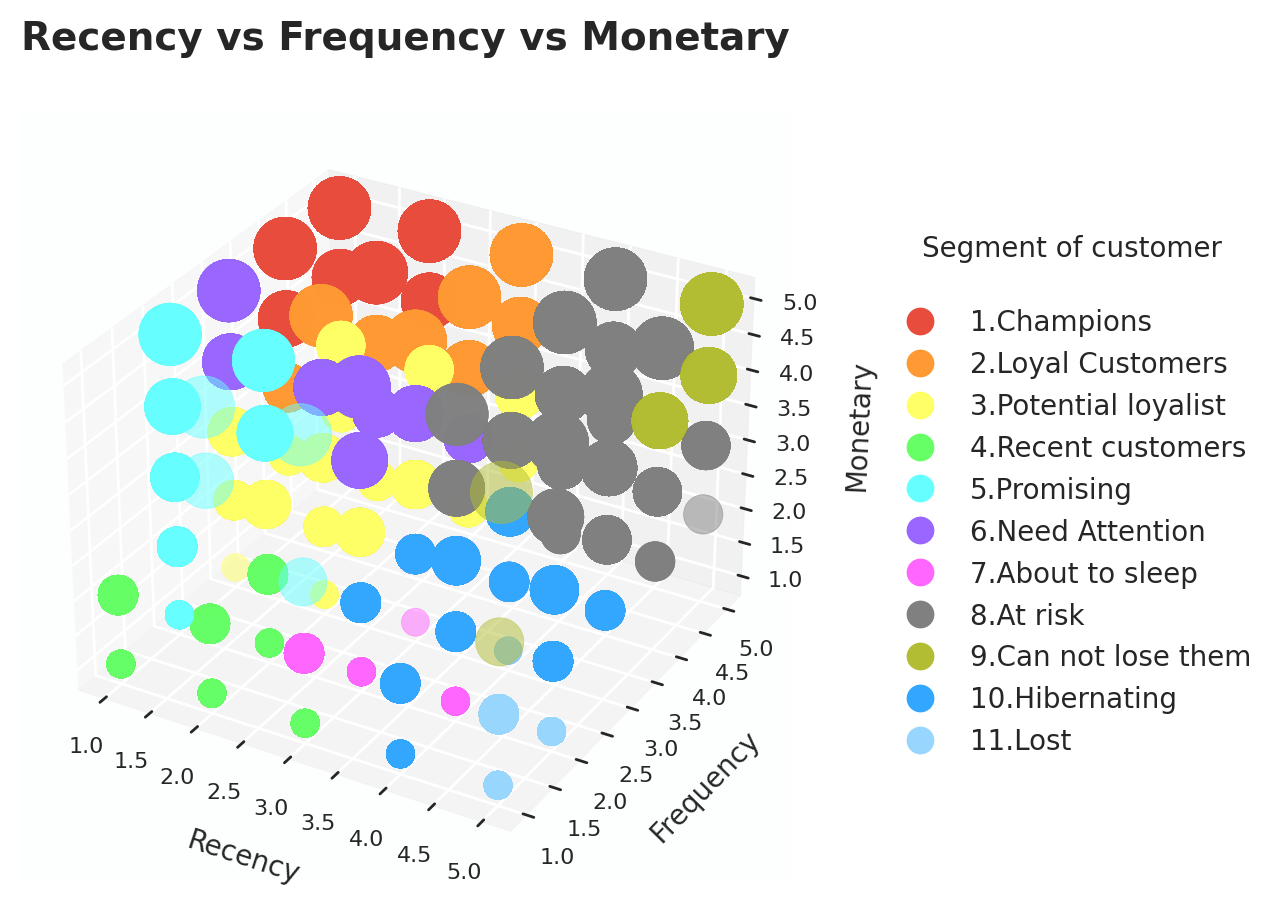

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import re

# Sample data
recency = pd.to_numeric(result['rank_R'])
frequency = pd.to_numeric(result['rank_F'])
monetary = pd.to_numeric(result['rank_M'])
segment = result['Group Segment']

# Sort the segment descriptions
segment_sorted = segment.unique()
segment_sorted.sort()

# Create a 3D plot
fig = plt.figure(figsize=(10,5),dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('#FDFEFE')

# Define bubble sizes (adjust the scaling factor as needed)
bubble_sizes = monetary * 100

# Define custom colors for each segment (slightly darker shades)
segment_colors = ['#E74C3C', '#FF9933', '#FFFF66', '#66FF66', '#66FFFF', '#9966FF', '#FF66FF', '#808080', '#B2BD33', '#33A6FF', '#99D6FF']


# Extract numerical prefixes from segment names
segment_prefixes = [re.findall(r'^\d+', seg)[0] if re.match(r'^\d+', seg) else '' for seg in segment_sorted]
sorted_indices = sorted(range(len(segment_prefixes)), key=lambda x: int(segment_prefixes[x]) if segment_prefixes[x].isdigit() else float('inf'))

# Sort the segment descriptions based on the numerical prefixes
segment_sorted = [segment_sorted[i] for i in sorted_indices]

# Iterate over segments and plot each segment separately
for i, seg in enumerate(segment_sorted):
    seg_recency = recency[segment == seg]
    seg_frequency = frequency[segment == seg]
    seg_monetary = monetary[segment == seg]
    seg_bubble_sizes = bubble_sizes[segment == seg]
    seg_color = segment_colors[i % len(segment_colors)]

    # Plot Recency vs Frequency vs Monetary as a bubble plot
    ax.scatter(seg_recency, seg_frequency, seg_monetary,
               c=seg_color, s=seg_bubble_sizes, alpha=0.5, label=seg)

# Customizing the plot
ax.set_xlabel('Recency', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.set_zlabel('Monetary', fontsize=10)

ax.tick_params(axis='x', which='major', labelsize=8,pad=2)
ax.tick_params(axis='y', which='major', labelsize=8,pad=2)
ax.tick_params(axis='z', which='major', labelsize=8,pad=2)

# Add legend on the right-hand side
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=seg, markerfacecolor=color, markersize=10)
                   for seg, color in zip(segment_sorted, segment_colors)]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.1, 0.5), title='Segment of customer\n', title_fontsize=10)

# Set the title with bold font and larger size
ax.set_title('Recency vs Frequency vs Monetary\n', fontweight='bold', fontsize=14)

# Display the plot
plt.show()


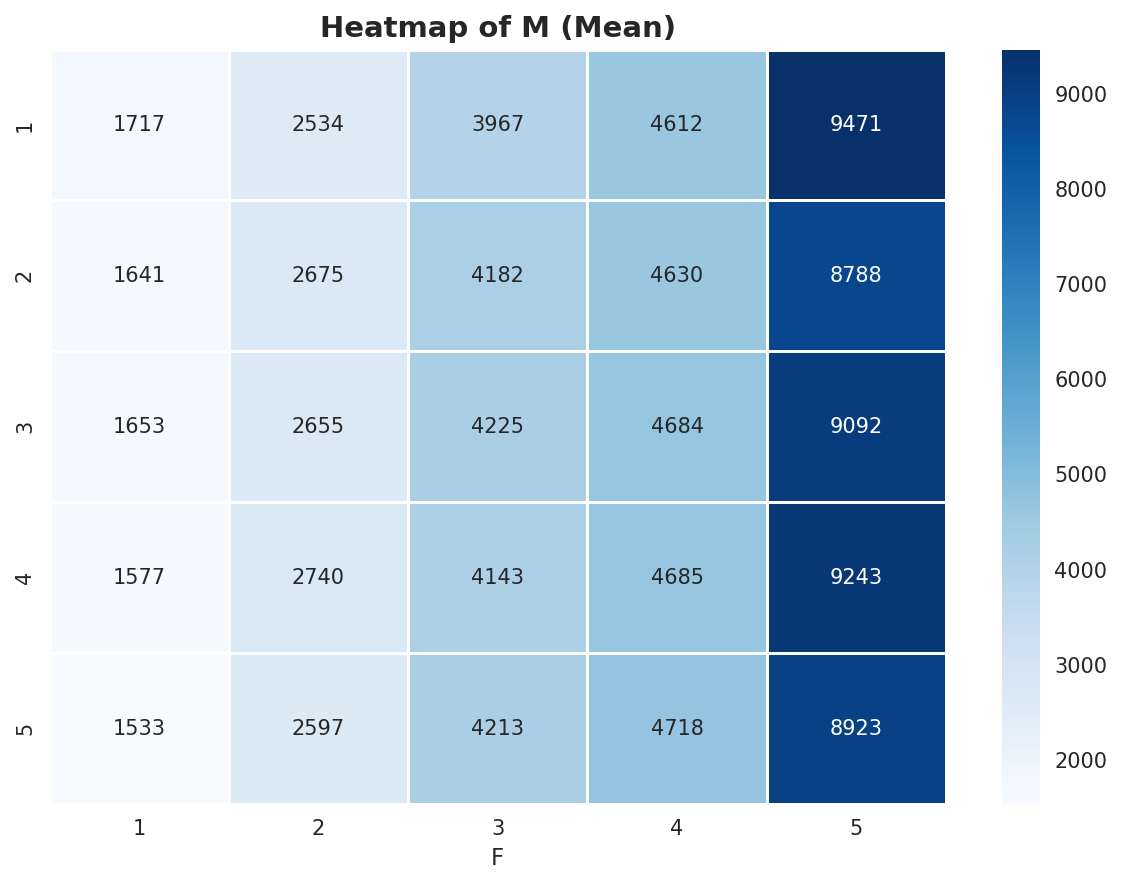

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table with 'rank_R' as index, 'rank_F' as columns, and 'Total_Trans_Amt' as values
heatmap_data = result.pivot_table(index='rank_R', columns='rank_F', values='Total_Trans_Amt', aggfunc='mean')

# Create a heatmap
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5, annot=True, fmt=".0f", cbar=True, ax=ax)

# Set labels and title
ax.set_xlabel('F')
ax.set_ylabel('')
ax.set_title('Heatmap of M (Mean)', fontweight='bold', fontsize=14)

# Adjust spacing
plt.tight_layout()

# Display the plot
plt.show()

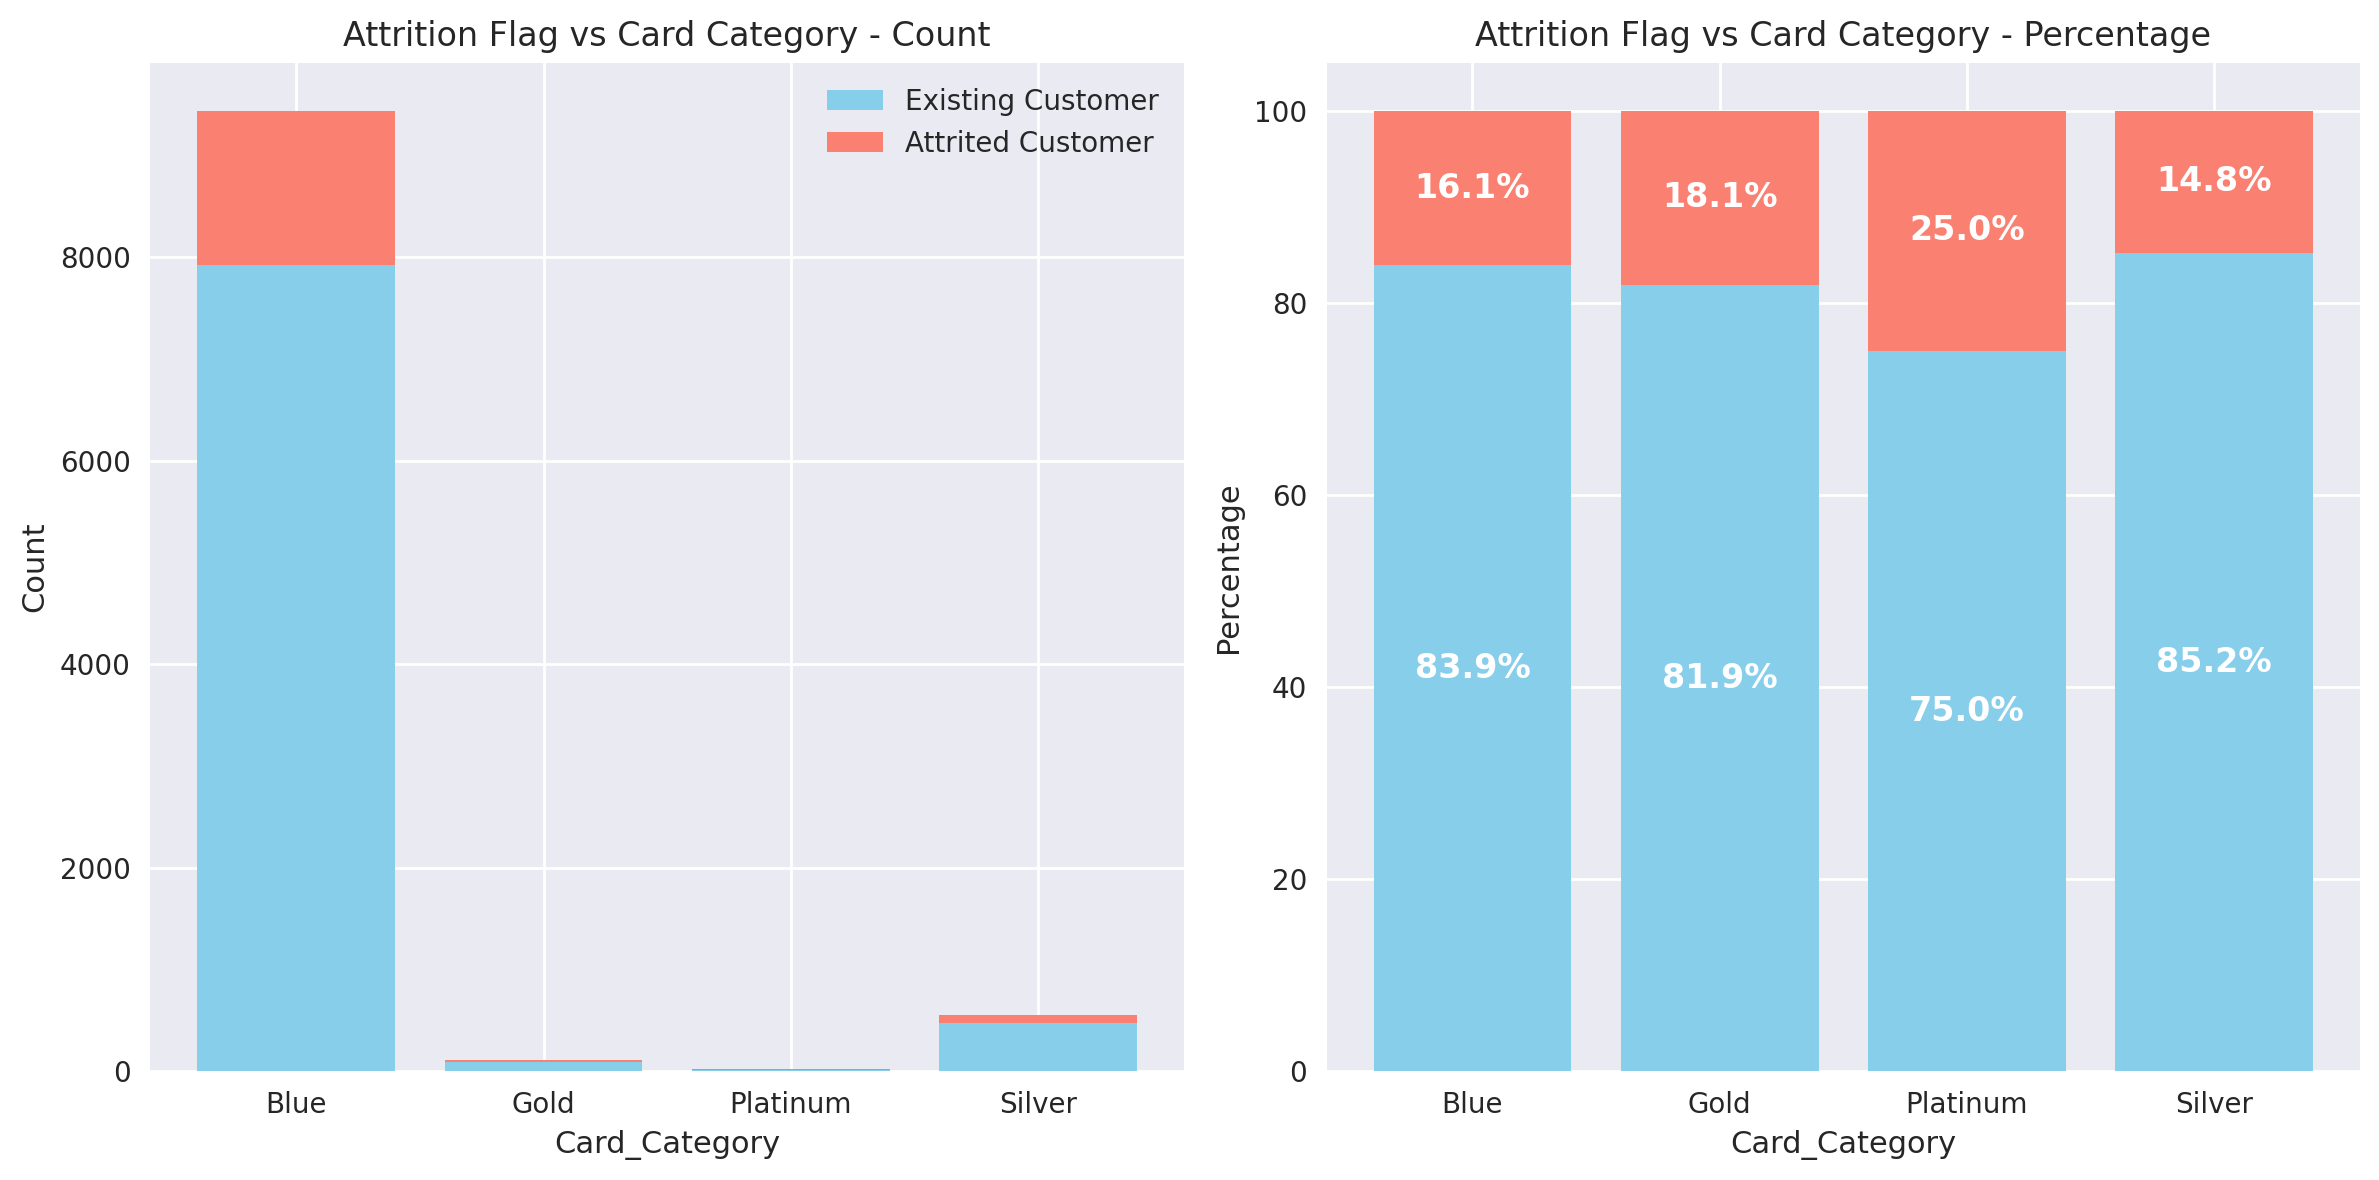

In [29]:
# Grouping the DataFrame by 'Card_Category' and 'Attrition_Flag' and counting the occurrences
grouped_counts = df_bank.groupby(['Card_Category', 'Attrition_Flag']).size().unstack()

# Calculating percentages
grouped_percentages = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=200)

# Plotting count bar chart
axs[0].bar(grouped_counts.index, grouped_counts['Existing Customer'], label='Existing Customer', color='skyblue')
axs[0].bar(grouped_counts.index, grouped_counts['Attrited Customer'], label='Attrited Customer', bottom=grouped_counts['Existing Customer'], color='salmon')
axs[0].set_xlabel('Card_Category')
axs[0].set_ylabel('Count')
axs[0].set_title('Attrition Flag vs Card Category - Count')
axs[0].legend()

# Plotting percentage bar chart
axs[1].bar(grouped_percentages.index, grouped_percentages['Existing Customer'], label='Existing Customer', color='skyblue')
axs[1].bar(grouped_percentages.index, grouped_percentages['Attrited Customer'], label='Attrited Customer', bottom=grouped_percentages['Existing Customer'], color='salmon')
axs[1].set_xlabel('Card_Category')
axs[1].set_ylabel('Percentage')
axs[1].set_title('Attrition Flag vs Card Category - Percentage')

# Adding percentages on top of each bar with bigger font size
for p in axs[1].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    axs[1].annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=12, fontweight='bold', color='white')

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the graph
plt.show()

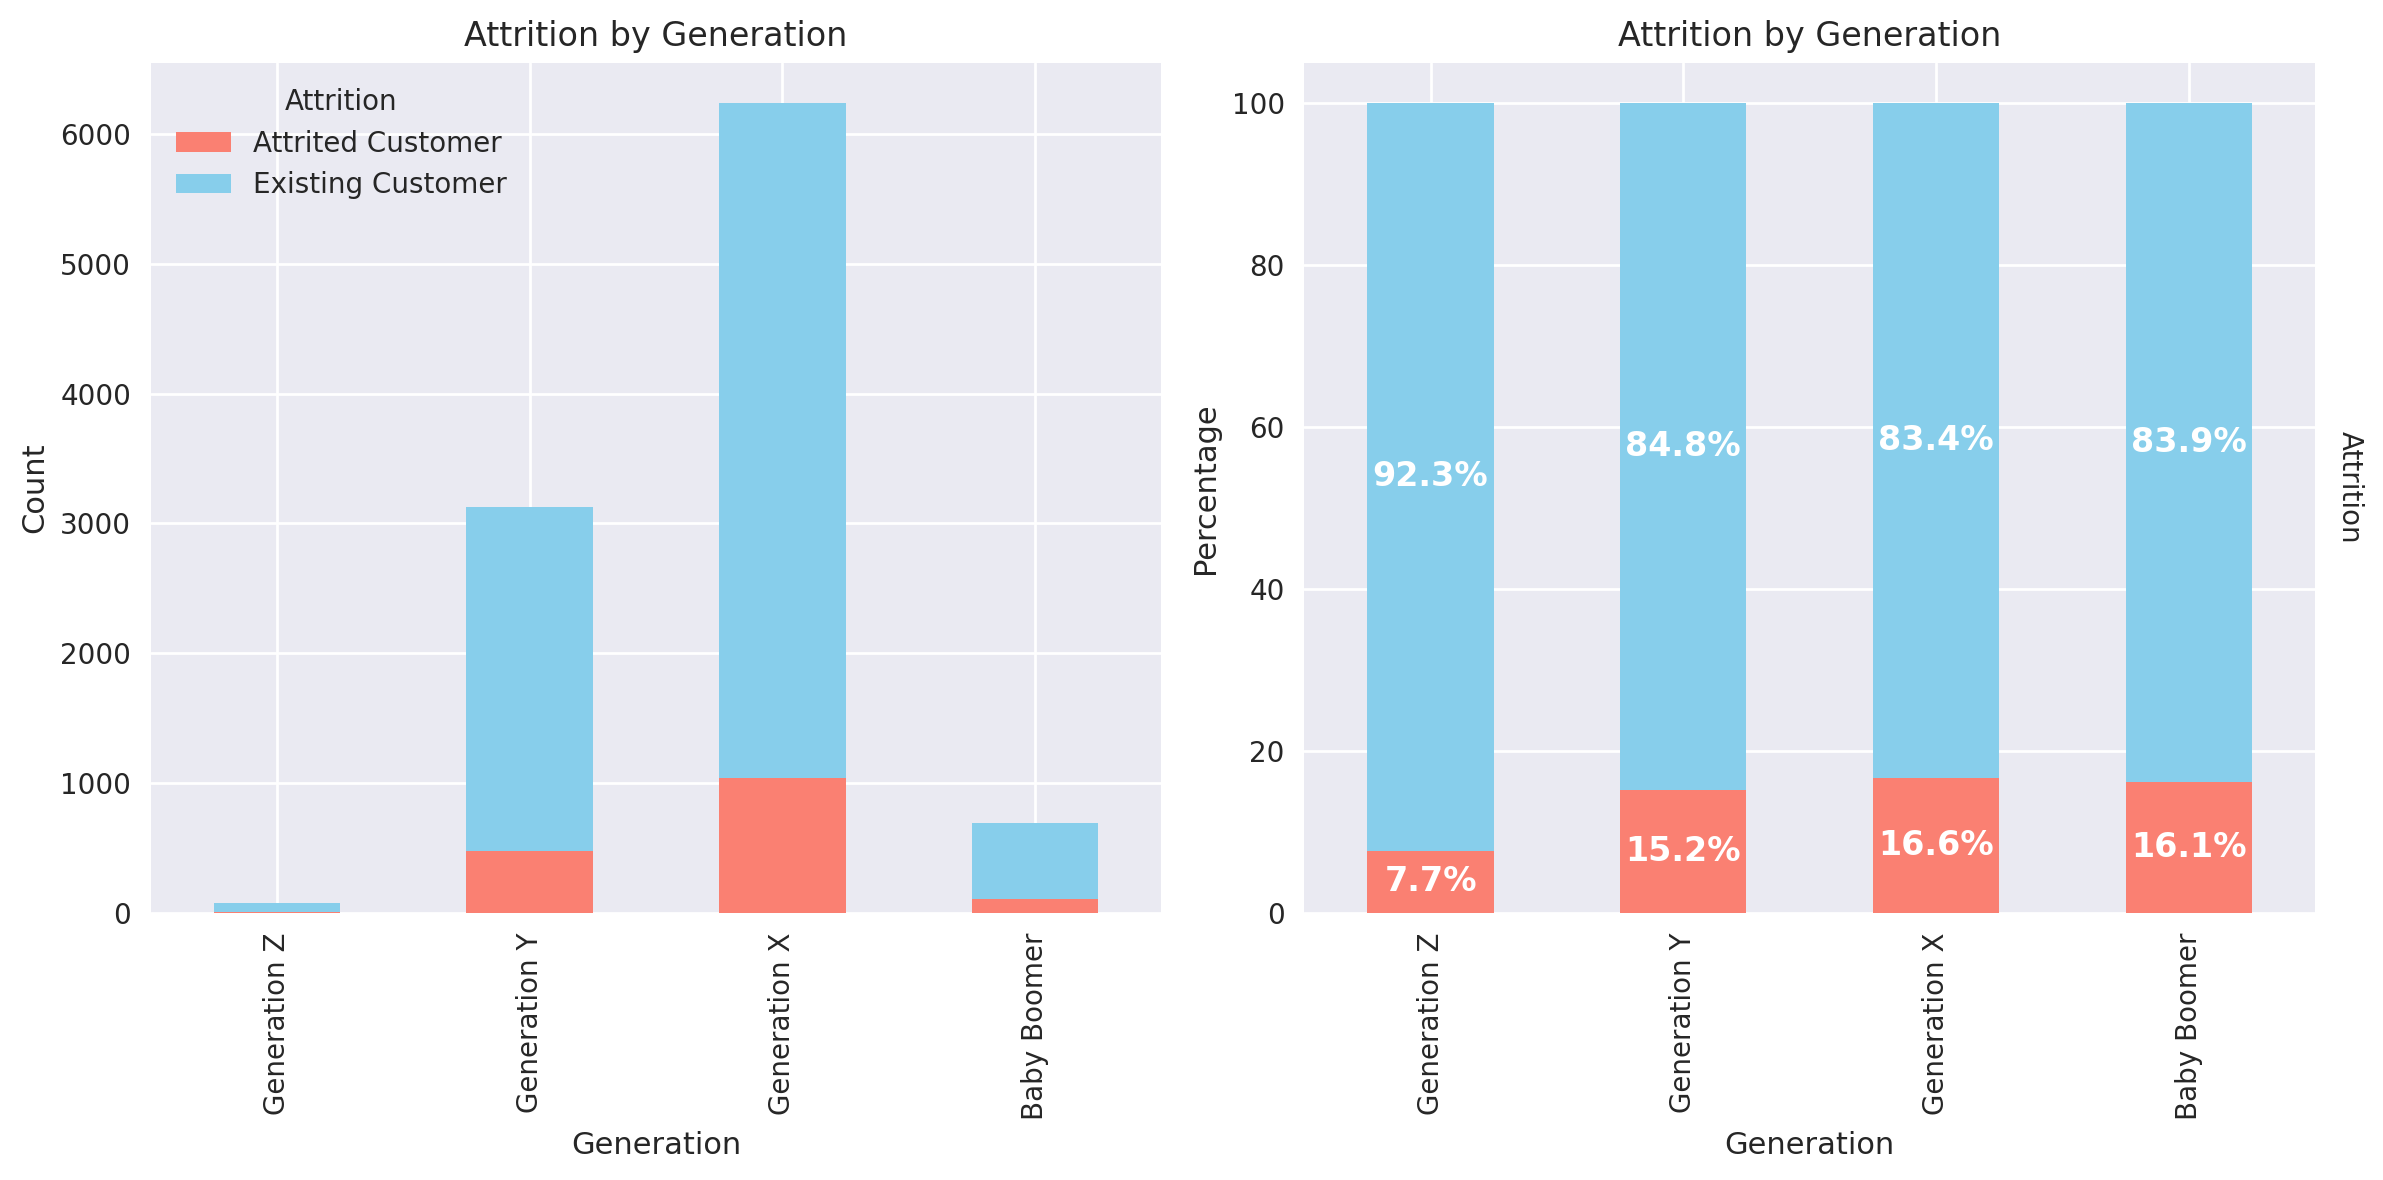

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a mapping for Attrition_Encoded labels
attrition_labels = {
    0: 'Existing Customer',
    1: 'Attrited Customer'
}

# Map Attrition_Encoded labels to the new values
df_bank['Attrition_Label'] = df_bank['Attrition_Encoded'].map(attrition_labels)

# Create a cross-tabulation between Generation and Attrition_Label
cross_tab = pd.crosstab(df_bank['Generation'], df_bank['Attrition_Label'])

# Calculate the percentages for each row
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Define darker colors for the bar charts
darker_colors = ['salmon', 'skyblue']

# Create a figure with a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), dpi=200)

# Plot the cross-tabulation as a bar chart with darker colors
cross_tab.plot(kind='bar', stacked=True, ax=axs[0], color=darker_colors)
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('Count')
axs[0].set_title('Attrition by Generation')
axs[0].legend(title='Attrition')

# Plot the cross-tabulation percentages as a bar chart with darker colors
cross_tab_percent.plot(kind='bar', stacked=True, ax=axs[1], color=darker_colors)
axs[1].set_xlabel('Generation')
axs[1].set_ylabel('Percentage')
axs[1].set_title('Attrition by Generation')
axs[1].legend().set_visible(False)  # Hide the legend

# Add a single legend description on the right side
axs[1].text(1.02, 0.5, 'Attrition', transform=axs[1].transAxes, va='center', rotation=-90)

# Adding percentages on top of each bar with bigger font size
for p in axs[1].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    axs[1].annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=12, fontweight='bold', color='white')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


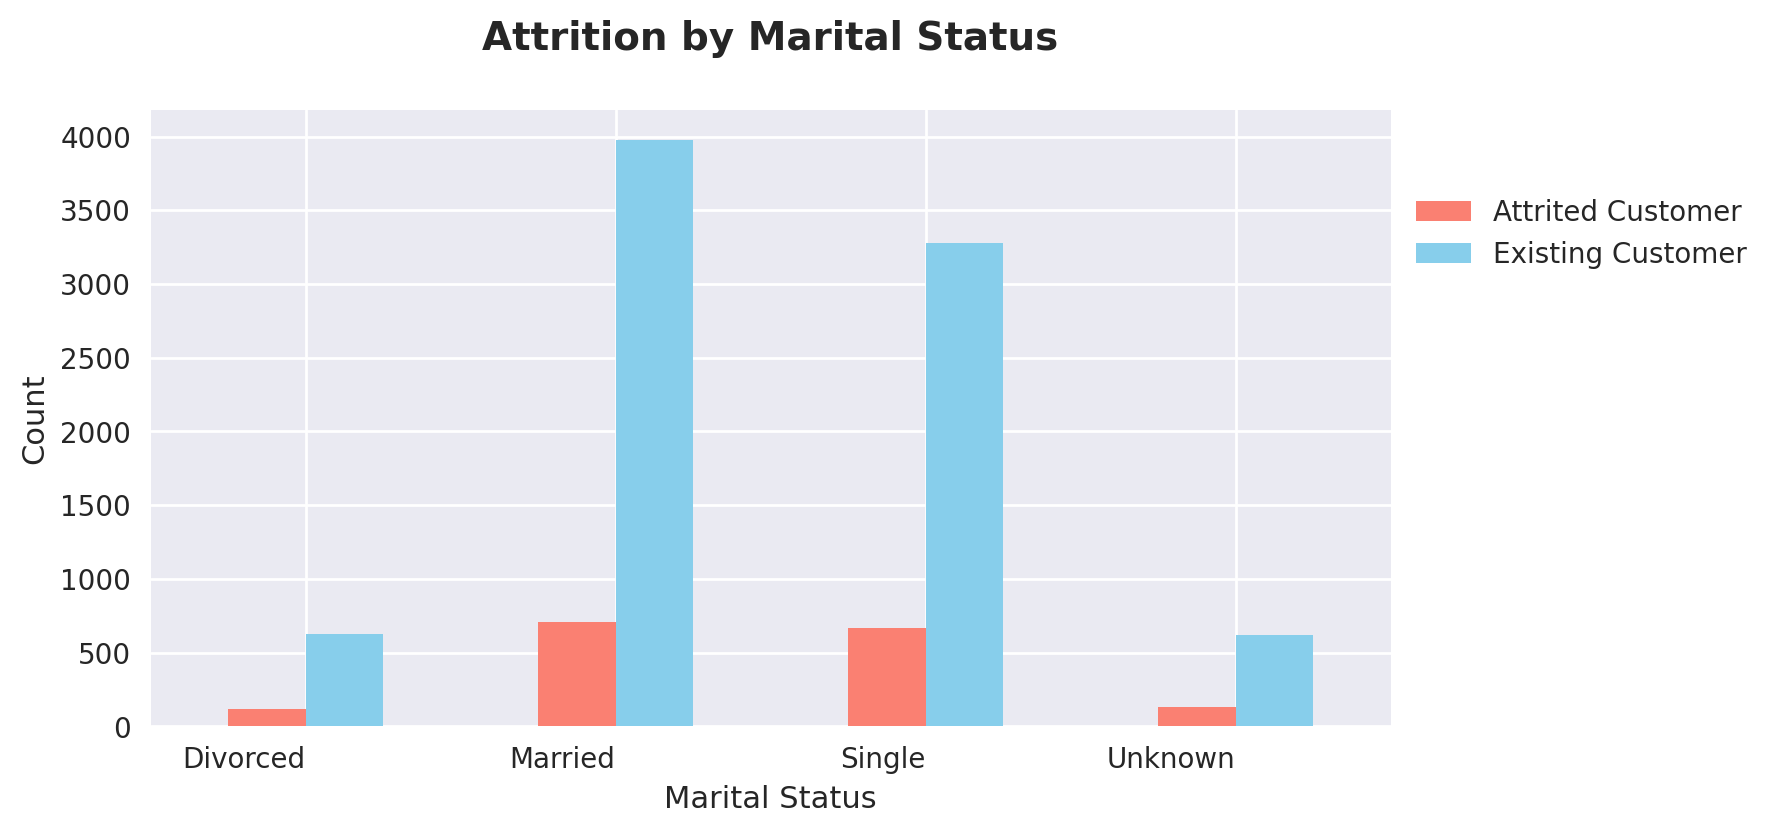

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by 'Marital_Status' and 'Attrition_Flag' columns
grouped_data = df_bank.groupby(['Marital_Status', 'Attrition_Flag']).size().unstack().fillna(0)

# Plot the bar chart with customized color
colors = ['salmon', 'skyblue']  # Red and blue colors
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)
grouped_data.plot(kind='bar', color=colors, ax=ax)

# Set labels and title
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
ax.set_title('Attrition by Marital Status\n', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Rotating x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

# Moving the legend outside of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

# Show the plot
plt.show()


### For RFM

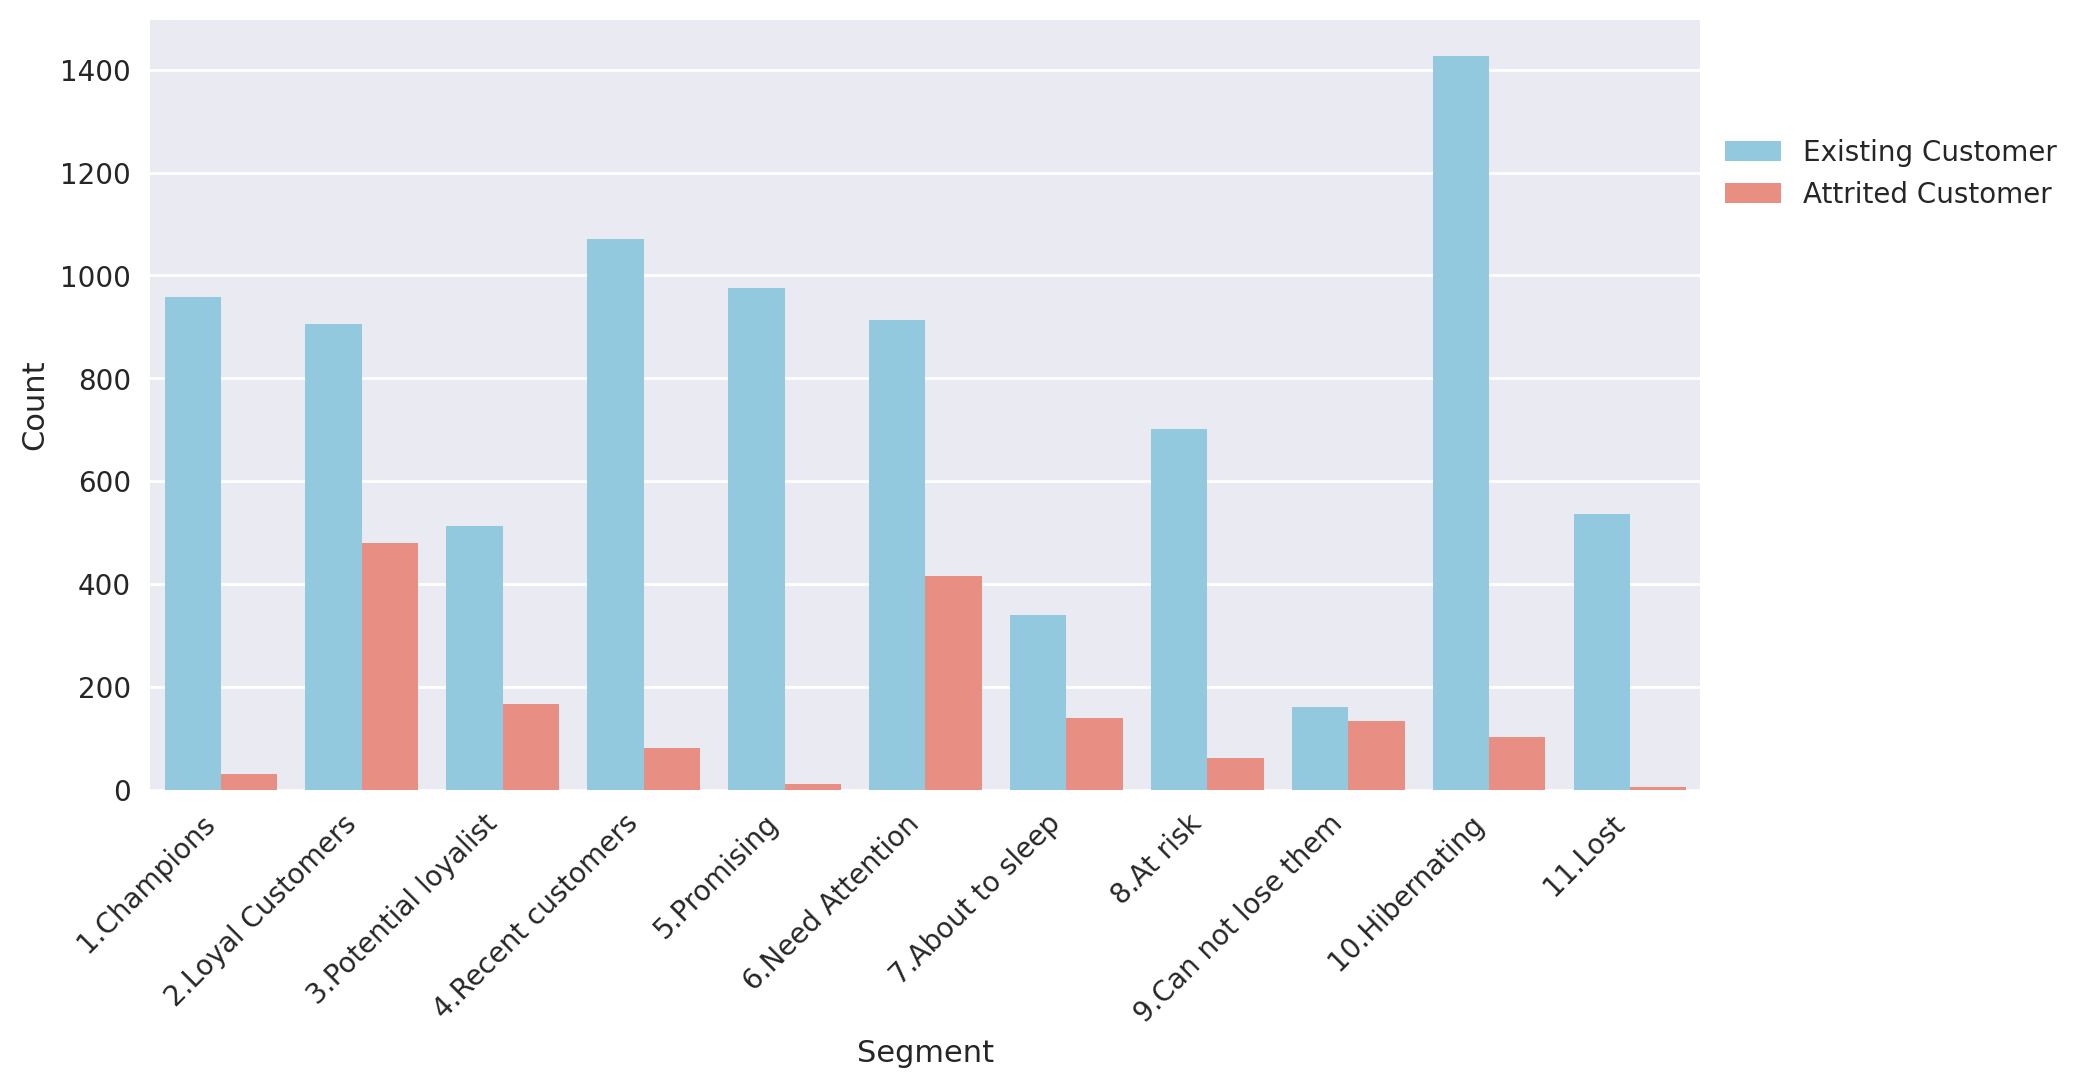

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

desired_order = ['1.Champions', '2.Loyal Customers', '3.Potential loyalist', '4.Recent customers', '5.Promising', '6.Need Attention', '7.About to sleep',
                 '8.At risk', '9.Can not lose them', '10.Hibernating', '11.Lost']

# Sorting the DataFrame by 'Group Segment'
result_sorted = result.sort_values('Group Segment')

# Define custom color palette
custom_palette = ['skyblue', 'salmon']

# Set dpi
dpi = 200

# Set figure size
fig, ax = plt.subplots(figsize=(10, 5), dpi=dpi)

# Plotting the countplot
sns.countplot(data=result_sorted, x='Group Segment', hue='Attrition_Flag', palette=custom_palette)

# Rotating x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding labels and title
ax.set_xticklabels(desired_order)
plt.xlabel('Segment')
plt.ylabel('Count')

# Moving the legend outside of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

# Displaying the plot
plt.show()


In [33]:
import numpy as np

# Define the conditions for updating the 'Group_visualized' column
condition = result['Group Segment'].isin(['8.At risk', '9.Can not lose them', '10.Hibernating'])

# Update the 'Group_visualized' column using numpy.where()
result['Group_visualized'] = np.where(condition, 'Group 8,9,10', 'others')

# Print the updated DataFrame
result


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      785387883  Existing Customer            47      F                3   
2      780466533  Existing Customer            54      M                3   
3      799224108  Existing Customer            46      F                4   
4      709122483  Existing Customer            56      M                3   
...          ...                ...           ...    ...              ...   
10122  713003358  Attrited Customer            40      M                3   
10123  812247033  Attrited Customer            51      F                3   
10124  710161083  Attrited Customer            62      F                0   
10125  711826983  Attrited Customer            47      F                3   
10126  718376583  Attrited Customer            52      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1         High School         Single     $40K - $60K          Blue   
2           Doctorate        Married         $120K +          Blue   
3            Graduate         Single  Less than $40K          Blue   
4            Graduate        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single    $80K - $120K          Blue   
10123      Uneducated        Married  Less than $40K          Blue   
10124      Uneducated         Single  Less than $40K          Blue   
10125         Unknown        Married     $40K - $60K          Blue   
10126        Graduate       Divorced    $80K - $120K        Silver   

       Months_on_book  ...  percentile_F  rank_F  percentile_M  rank_M  type  \
0                  39  ...      0.211563       2      0.027698       1   421   
1                  41  ...      0.273181       2      0.124173       1   421   
2                  41  ...      0.321171       2      0.189790       1   421   
3                  40  ...      0.225338       2      0.150834       1   421   
4                  37  ...      0.337119       2      0.198479       1   421   
...               ...  ...           ...     ...           ...     ...   ...   
10122              30  ...      0.184704       1      0.810408       5   215   
10123              46  ...      0.171769       1      0.407673       3   513   
10124              36  ...      0.184704       1      0.858102       5   315   
10125              36  ...      0.158685       1      0.403673       3   313   
10126              44  ...      0.184704       1      0.856028       5   515   

       RFM            Segment  No        Group Segment  Group_visualized  
0      421     About to sleep   7     7.About to sleep            others  
1      421     About to sleep   7     7.About to sleep            others  
2      421     About to sleep   7     7.About to sleep            others  
3      421     About to sleep   7     7.About to sleep            others  
4      421     About to sleep   7     7.About to sleep            others  
...    ...                ...  ..                  ...               ...  
10122  215          Promising   5          5.Promising            others  
10123  513  Can not lose them   9  9.Can not lose them      Group 8,9,10  
10124  315          Promising   5          5.Promising            others  
10125  313          Promising   5          5.Promising            others  
10126  515  Can not lose them   9  9.Can not lose them      Group 8,9,10  

[10127 rows x 35 columns]

In [34]:
import numpy as np

# Filter the DataFrame based on the condition
filtered_result = result[result['Attrition_Flag'] == 'Existing Customer']

# Define the conditions for updating the 'Group_visualized' column
condition = filtered_result['Group Segment'].isin(['8.At risk', '9.Can not lose them', '10.Hibernating'])

# Update the 'Group_visualized' column using numpy.where()
filtered_result['Group_visualized'] = np.where(condition, 'Group 8,9,10', 'others')

print(filtered_result)



       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      785387883  Existing Customer            47      F                3   
2      780466533  Existing Customer            54      M                3   
3      799224108  Existing Customer            46      F                4   
4      709122483  Existing Customer            56      M                3   
...          ...                ...           ...    ...              ...   
10084  719534058  Existing Customer            26      F                0   
10085  794475483  Existing Customer            44      M                4   
10089  789345408  Existing Customer            39      F                2   
10096  717684858  Existing Customer            50      M                3   
10097  778143183  Existing Customer            47      M                1   

      Education_Level Marital_Status Income_Category Card_Category  \
0    

<ipython-input-34-85c0e67566e0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_result['Group_visualized'] = np.where(condition, 'Group 8,9,10', 'others')


<ipython-input-35-a641014a4f12>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_result['Percentage'] = (filtered_result['Total_Trans_Amt'] / total_sum) * 100


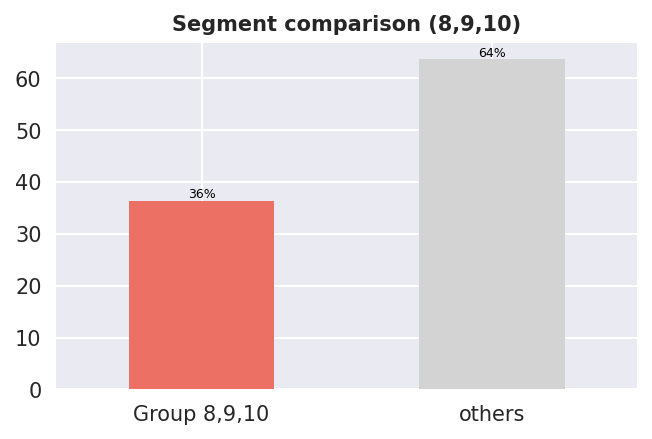

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the total sum of 'Total_Trans_Amt'
total_sum = filtered_result['Total_Trans_Amt'].sum()

# Calculate the percentage of each group's sum
filtered_result['Percentage'] = (filtered_result['Total_Trans_Amt'] / total_sum) * 100

# Define custom colors for each bar
colors = ['#EC7063', 'lightgrey']

# Set the plot size
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)

# Plotting the bar plot
bar_plot = filtered_result.groupby('Group_visualized')['Percentage'].sum().plot(kind='bar', color=colors, ax=ax)

# Adding labels and title
plt.title('Segment comparison (8,9,10)',fontweight='bold', fontsize=10)

# Remove x-label
plt.xlabel('')


# Rotate x-labels
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0)

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', color='black', fontsize=6)

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Displaying the plot
plt.show()


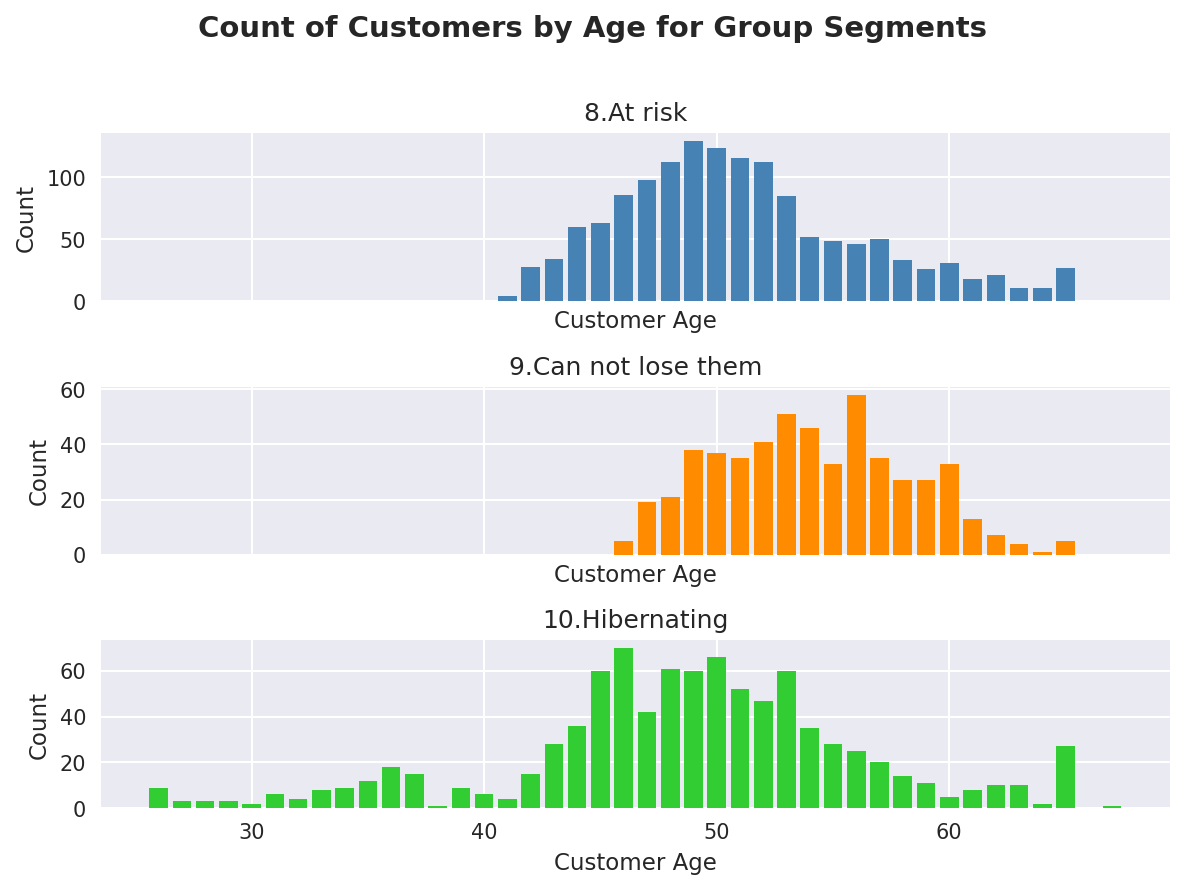

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the group segments
group_segments = ['8.At risk', '9.Can not lose them', '10.Hibernating']

# Define colors for each segment
colors = ['steelblue', 'darkorange', 'limegreen']

# Set up the subplots
fig, axes = plt.subplots(nrows=len(group_segments), ncols=1, figsize=(8, 6), dpi=150, sharex=True)

# Iterate over each group segment and create separate bar plots
for i, segment in enumerate(group_segments):
    segment_data = filtered_result[filtered_result['Group Segment'] == segment]
    segment_data = segment_data.groupby('Customer_Age').size().reset_index(name='Count')  # Group and count by 'Customer_Age'
    segment_data = segment_data.sort_values('Customer_Age')  # Sort by 'Customer_Age'
    axes[i].bar(segment_data['Customer_Age'], segment_data['Count'], color=colors[i])
    axes[i].set_xlabel('Customer Age')
    axes[i].set_ylabel('Count')
    axes[i].set_title(segment)


# Add overall title
fig.suptitle('Count of Customers by Age for Group Segments\n', fontsize=14, fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-37-cb9a5a3346a8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_result['Generation'] = pd.cut(filtered_result['Customer_Age'], bins=[0] + [r[1] for r in generation_ranges.values()], labels=list(generation_ranges.keys()))


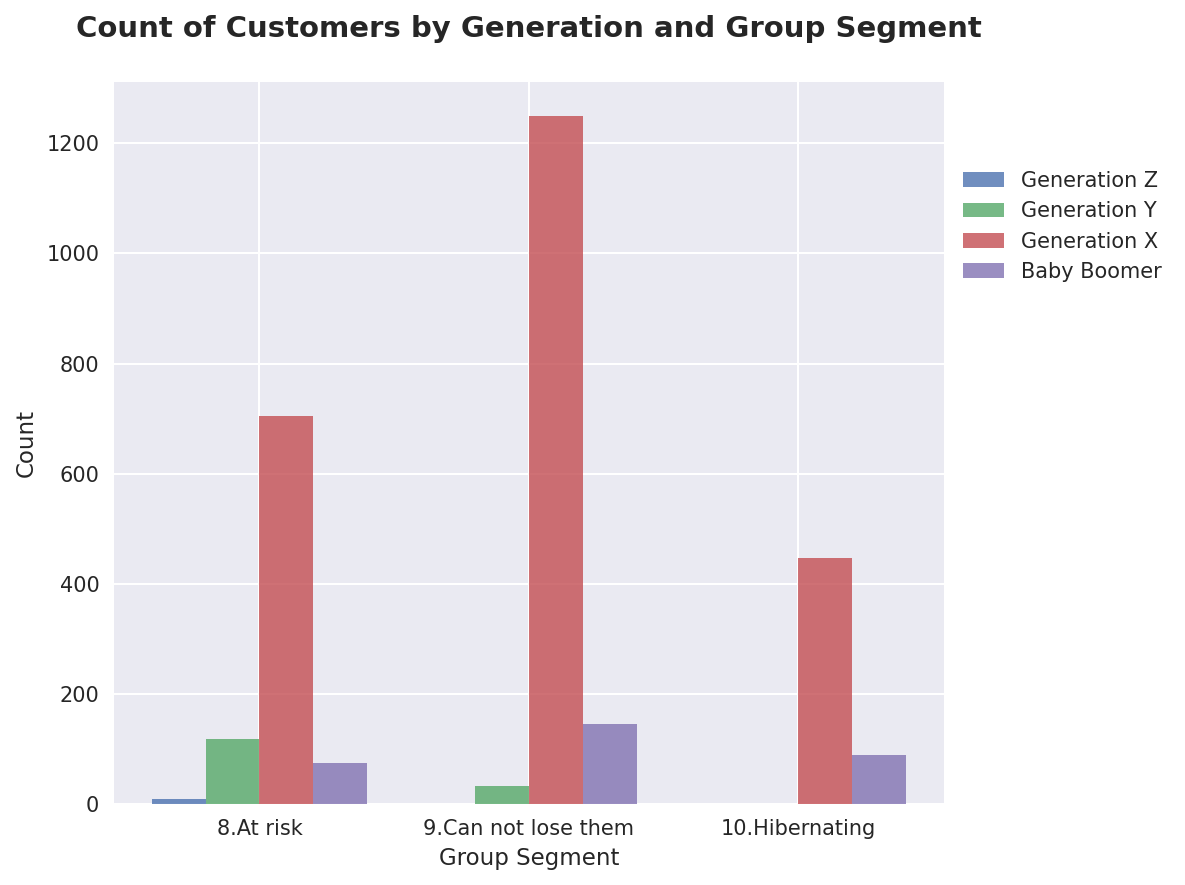

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the age ranges for each generation
generation_ranges = {
    'Generation Z': (11, 26),
    'Generation Y': (27, 42),
    'Generation X': (43, 58),
    'Baby Boomer': (59, 120)  # Use a large upper bound for the last generation
}

# Create a new column 'Generation' based on the age ranges
filtered_result['Generation'] = pd.cut(filtered_result['Customer_Age'], bins=[0] + [r[1] for r in generation_ranges.values()], labels=list(generation_ranges.keys()))

# Filter the data for the selected group segments
filtered_data = filtered_result[filtered_result['Group Segment'].isin(group_segments)]

# Group the data by 'Group Segment' and 'Generation' and count the number of occurrences
segment_counts = filtered_data.groupby(['Group Segment', 'Generation']).size().unstack()

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)

# Set the x-axis positions
x = np.arange(len(group_segments))

# Set the width of each bar
bar_width = 0.2

# Plot the bar chart for each generation
for i, generation in enumerate(segment_counts.columns):
    offset = (i - 1.5) * bar_width
    counts = segment_counts[generation]
    ax.bar(x + offset, counts, width=bar_width, label=generation, alpha=0.8)

# Set the x-axis labels and title
ax.set_xlabel('Group Segment')
ax.set_ylabel('Count')
ax.set_title('Count of Customers by Generation and Group Segment\n', fontsize=14, fontweight='bold')

# Set the x-axis tick positions and labels
ax.set_xticks(x)
ax.set_xticklabels(group_segments)

# Moving the legend outside of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

# Adjust spacing
plt.tight_layout()

# Display the plot
plt.show()

# print(segment_counts)


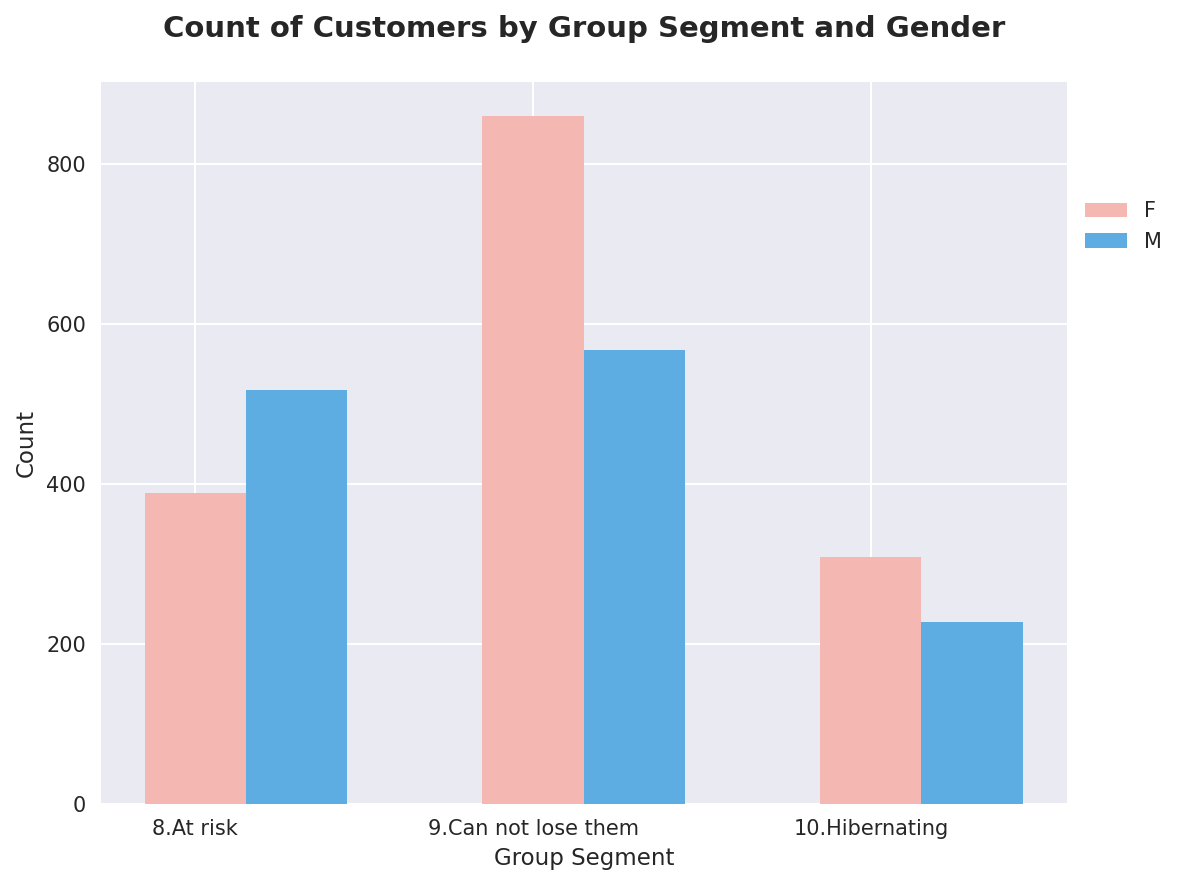

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the group segments
group_segments = ['8.At risk', '9.Can not lose them', '10.Hibernating']

# Define colors for each segment
colors = ['steelblue', 'darkorange', 'limegreen']

# Set up the subplots
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)

# Group and count the data by 'Gender' for each group segment
group_data = filtered_result[filtered_result['Group Segment'].isin(group_segments)]
group_data = group_data.groupby(['Group Segment', 'Gender']).size().unstack()

# Get the unique gender values
genders = group_data.columns

# Calculate the width of each bar
bar_width = 0.3

# Set the x positions for the bars
x = range(len(group_segments))

# Create grouped bar chart
colors_ =['#F5B7B1','#5DADE2']
for i, gender in enumerate(genders):
    ax.bar([val + i * bar_width for val in x], group_data[gender], width=bar_width, color=colors_[i],label=gender)

# Set x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(group_segments)

# Set labels and title
ax.set_xlabel('Group Segment')
ax.set_ylabel('Count')
ax.set_title('Count of Customers by Group Segment and Gender\n', fontsize=14, fontweight='bold')

# Moving the legend outside of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


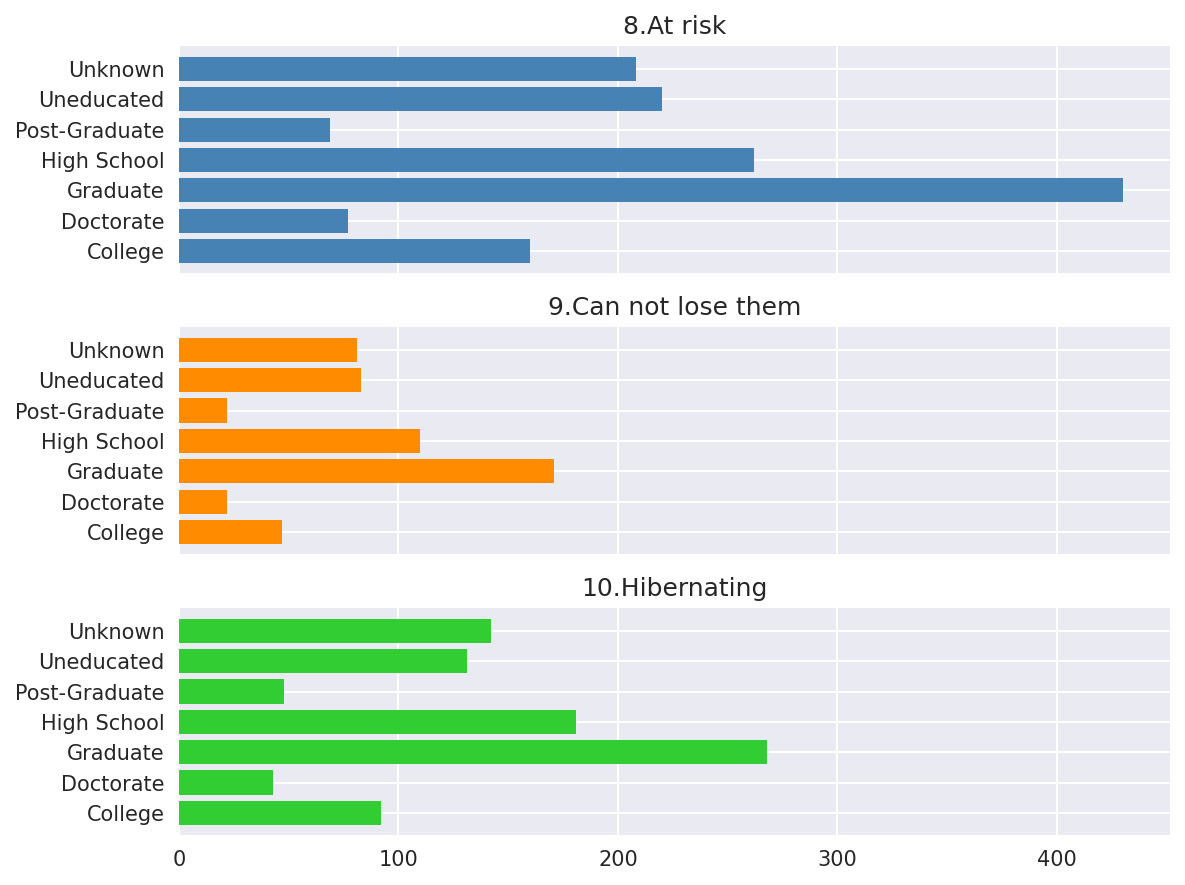

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the group segments
group_segments = ['8.At risk', '9.Can not lose them', '10.Hibernating']

# Define colors for each segment
colors = ['steelblue', 'darkorange', 'limegreen']

# Set up the subplots
fig, axes = plt.subplots(nrows=len(group_segments), ncols=1, figsize=(8, 6), dpi=150, sharex=True)

# Iterate over each group segment and create separate horizontal bar plots
for i, segment in enumerate(group_segments):
    ax = axes[i]
    segment_data = filtered_result[filtered_result['Group Segment'] == segment]
    segment_data = segment_data.groupby('Education_Level').size().reset_index(name='Count')  # Group and count by 'Education_Level'
    segment_data = segment_data.sort_values('Education_Level')  # Sort by 'Education_Level'
    ax.barh(segment_data['Education_Level'], segment_data['Count'], color=colors[i])  # Use barh for horizontal bar plot
    ax.set_title(segment)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-40-f13361929043>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


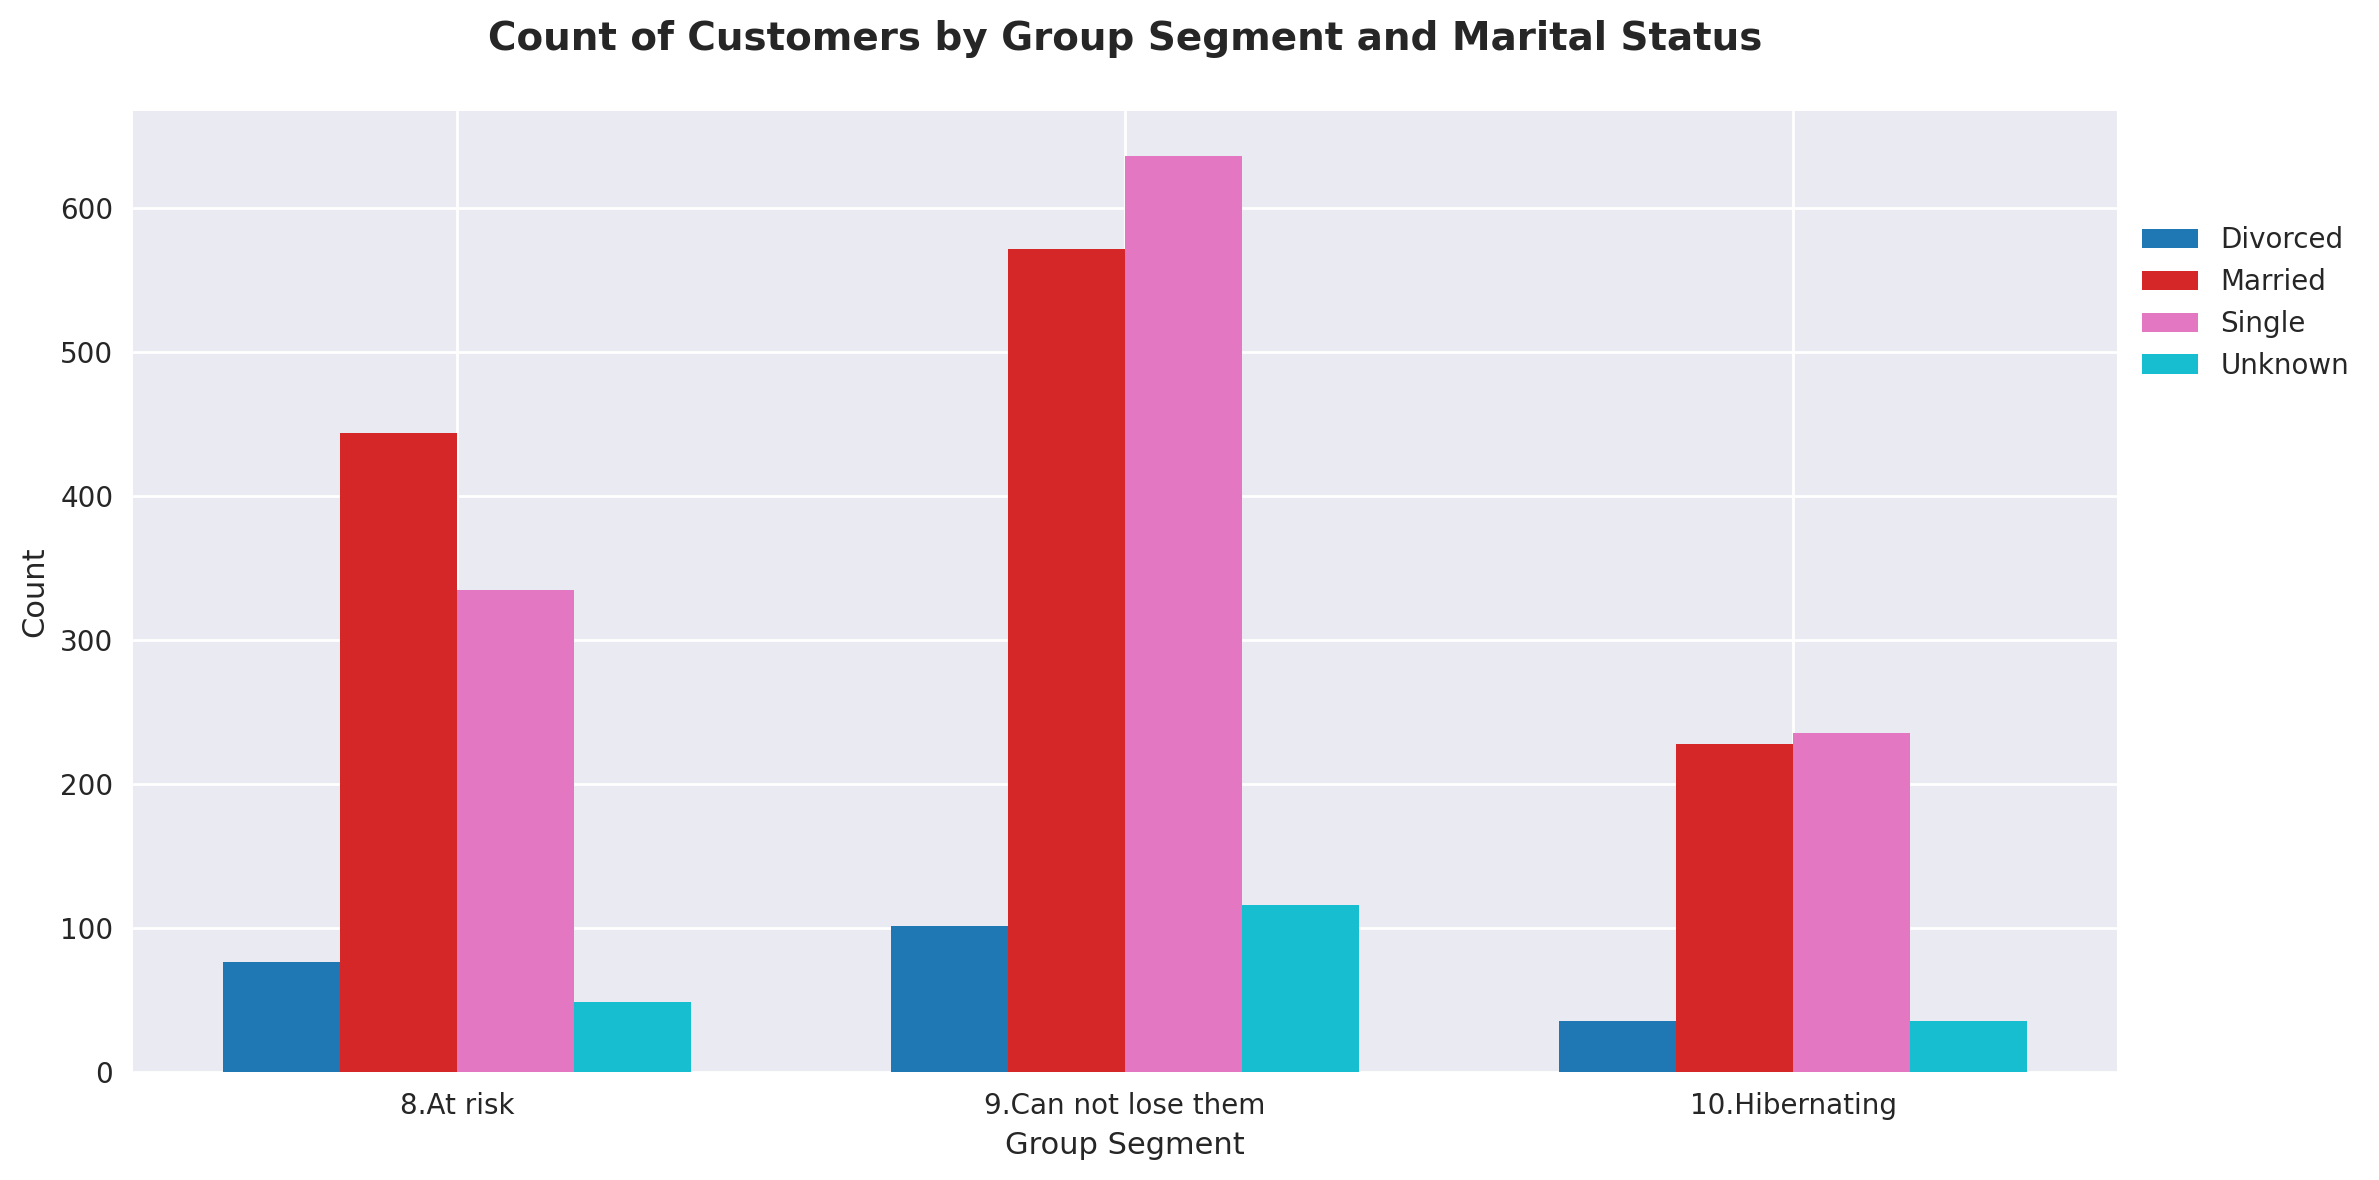

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the group segments
group_segments = ['8.At risk', '9.Can not lose them', '10.Hibernating']

# Set up the subplots
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

# Group and count the data by 'Marital_Status' for each group segment
group_data = filtered_result[filtered_result['Group Segment'].isin(group_segments)]
group_data = group_data.groupby(['Group Segment', 'Marital_Status']).size().unstack()

# Get the unique marital status values
marital_statuses = group_data.columns

# Calculate the width of each bar
total_bars = len(group_segments)
total_groups = len(marital_statuses)
bar_width = 0.7 / total_groups

# Set the x positions for the bars
x = np.arange(total_bars)

# Create colormap
cmap = plt.cm.get_cmap('tab10')
colors = cmap(np.linspace(0, 1, total_groups))

# Create grouped bar chart
for i, marital_status in enumerate(marital_statuses):
    offset = (i - (total_groups - 1) / 2) * bar_width
    ax.bar(x + offset, group_data[marital_status], width=bar_width, color=colors[i], label=marital_status)

# Set x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(group_segments)

# Set labels and title
ax.set_xlabel('Group Segment')
ax.set_ylabel('Count')
ax.set_title('Count of Customers by Group Segment and Marital Status\n', fontsize=14, fontweight='bold')

# Moving the legend outside of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-41-3e0de5ba327c>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


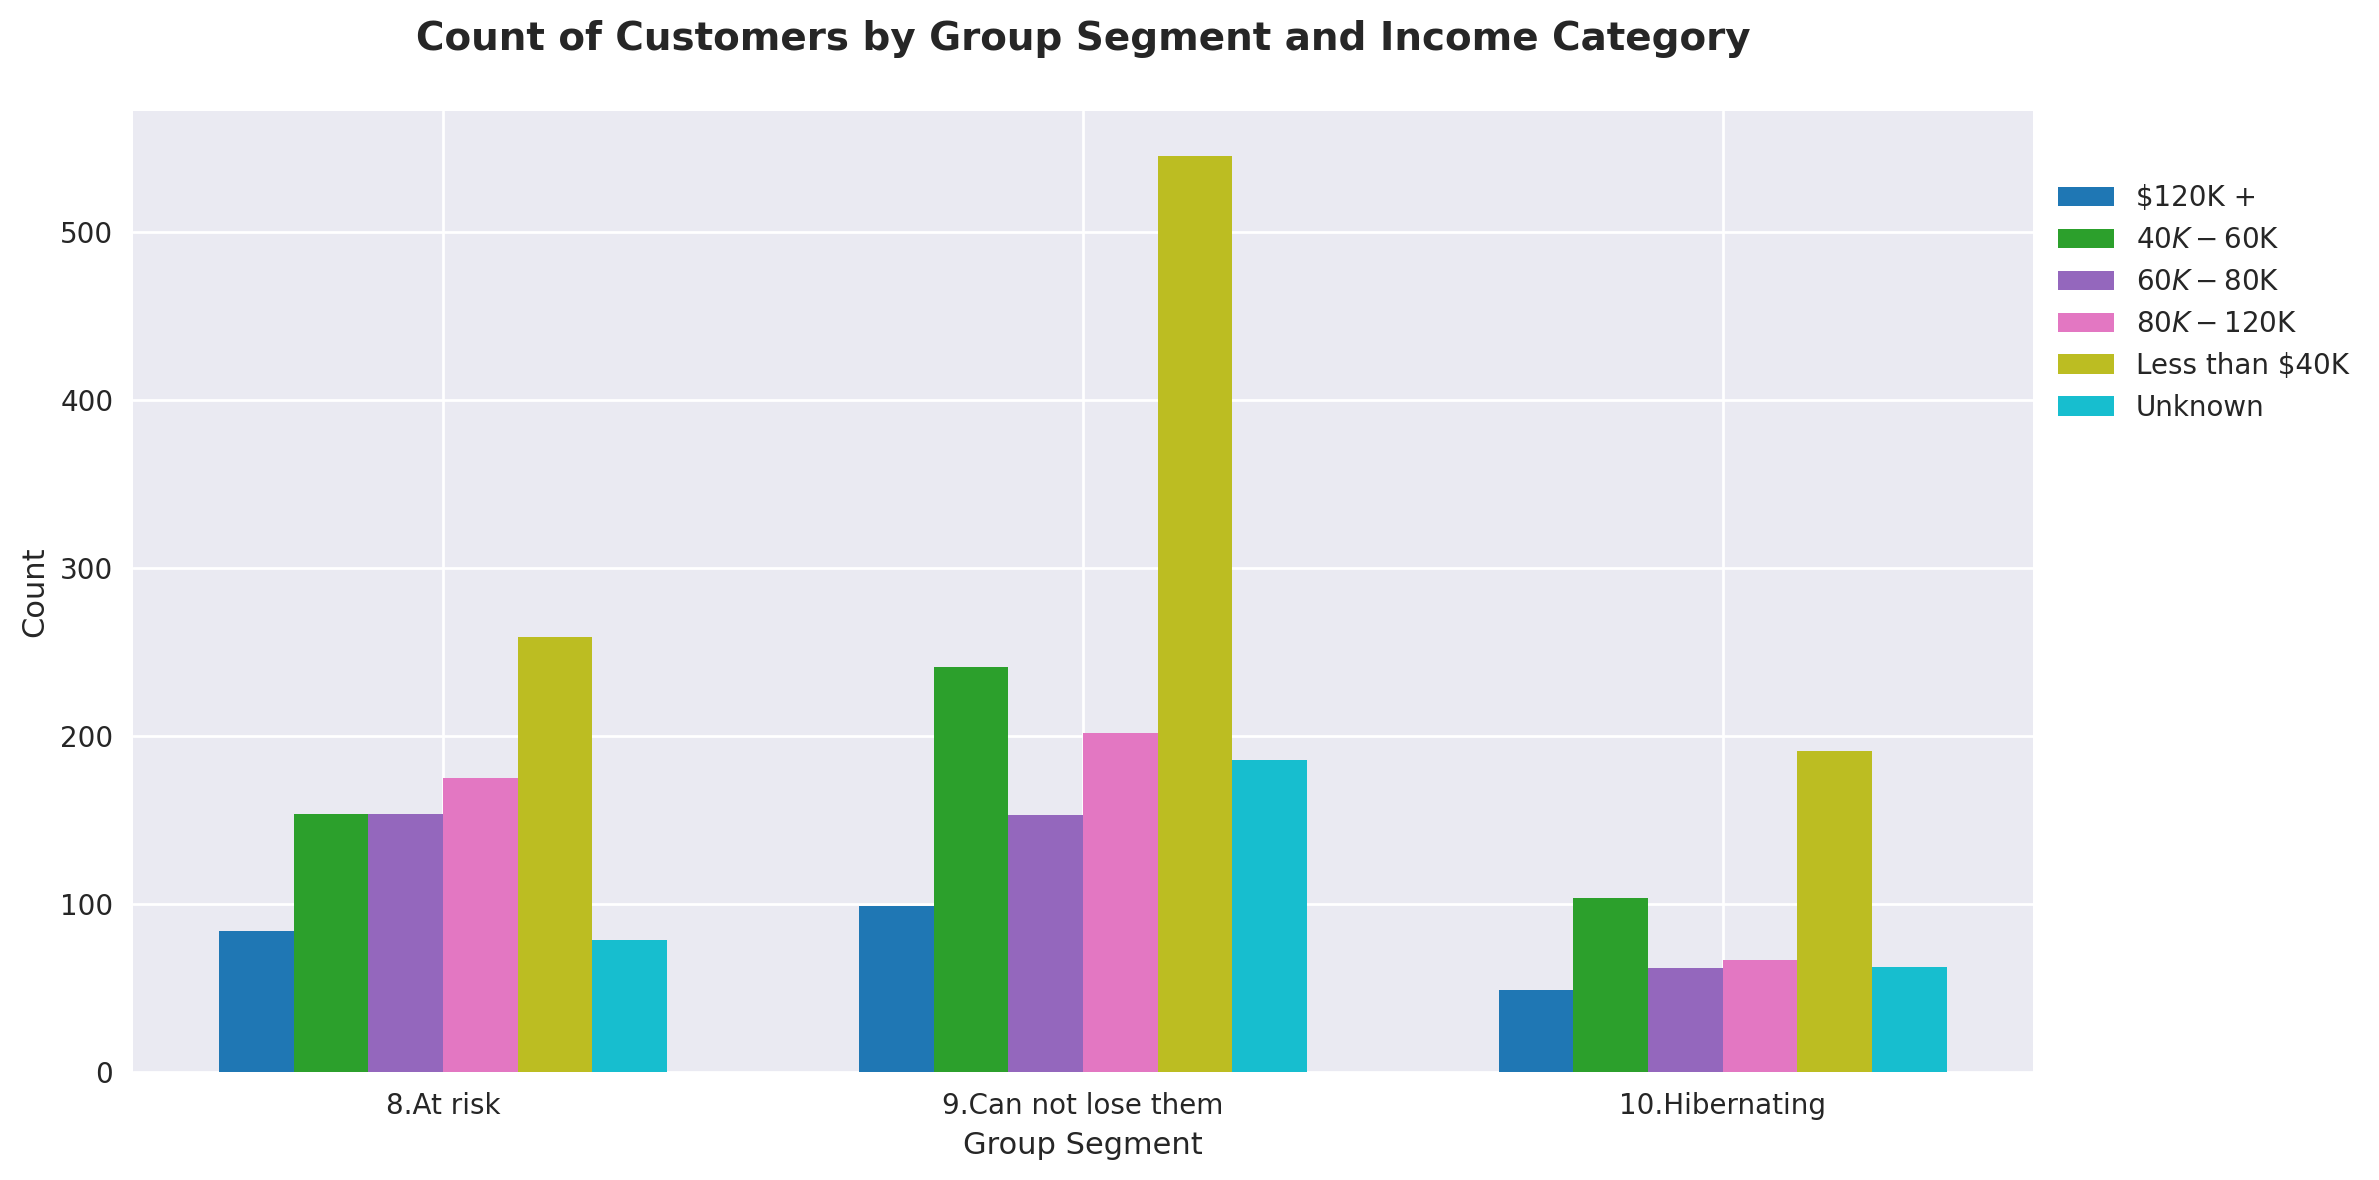

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the group segments
group_segments = ['8.At risk', '9.Can not lose them', '10.Hibernating']

# Set up the subplots
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

# Group and count the data by 'Income_Category' for each group segment
group_data = filtered_result[filtered_result['Group Segment'].isin(group_segments)]
group_data = group_data.groupby(['Group Segment', 'Income_Category']).size().unstack()

# Get the unique income categories
income_categories = group_data.columns

# Calculate the width of each bar
total_bars = len(group_segments)
total_groups = len(income_categories)
bar_width = 0.7 / total_groups

# Set the x positions for the bars
x = np.arange(total_bars)

# Create colormap
cmap = plt.cm.get_cmap('tab10')
colors = cmap(np.linspace(0, 1, total_groups))

# Create grouped bar chart
for i, income_category in enumerate(income_categories):
    offset = (i - (total_groups - 1) / 2) * bar_width
    ax.bar(x + offset, group_data[income_category], width=bar_width, color=colors[i], label=income_category)

# Set x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(group_segments)

# Set labels and title
ax.set_xlabel('Group Segment')
ax.set_ylabel('Count')
ax.set_title('Count of Customers by Group Segment and Income Category\n', fontsize=14, fontweight='bold')

# Moving the legend outside of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [42]:
df_demo =result.loc[ : ,['Customer_Age', 'Months_on_book', 'Gender', 'Education_Level', 'Total_Trans_Amt', 'Total_Trans_Ct','Segment']]
display(df_demo)

Customer_Age  Months_on_book Gender Education_Level  Total_Trans_Amt  \
0                45              39      M     High School             1144   
1                47              41      F     High School             1594   
2                54              41      M       Doctorate             1873   
3                46              40      F        Graduate             1715   
4                56              37      M        Graduate             1909   
...             ...             ...    ...             ...              ...   
10122            40              30      M        Graduate             4983   
10123            51              46      F      Uneducated             3281   
10124            62              36      F      Uneducated             6613   
10125            47              36      F         Unknown             3240   
10126            52              44      M        Graduate             5806   

       Total_Trans_Ct            Segment  
0                  42     About to sleep  
1                  47     About to sleep  
2                  52     About to sleep  
3                  43     About to sleep  
4                  54     About to sleep  
...               ...                ...  
10122              40          Promising  
10123              39  Can not lose them  
10124              40          Promising  
10125              38          Promising  
10126              40  Can not lose them  

[10127 rows x 7 columns]

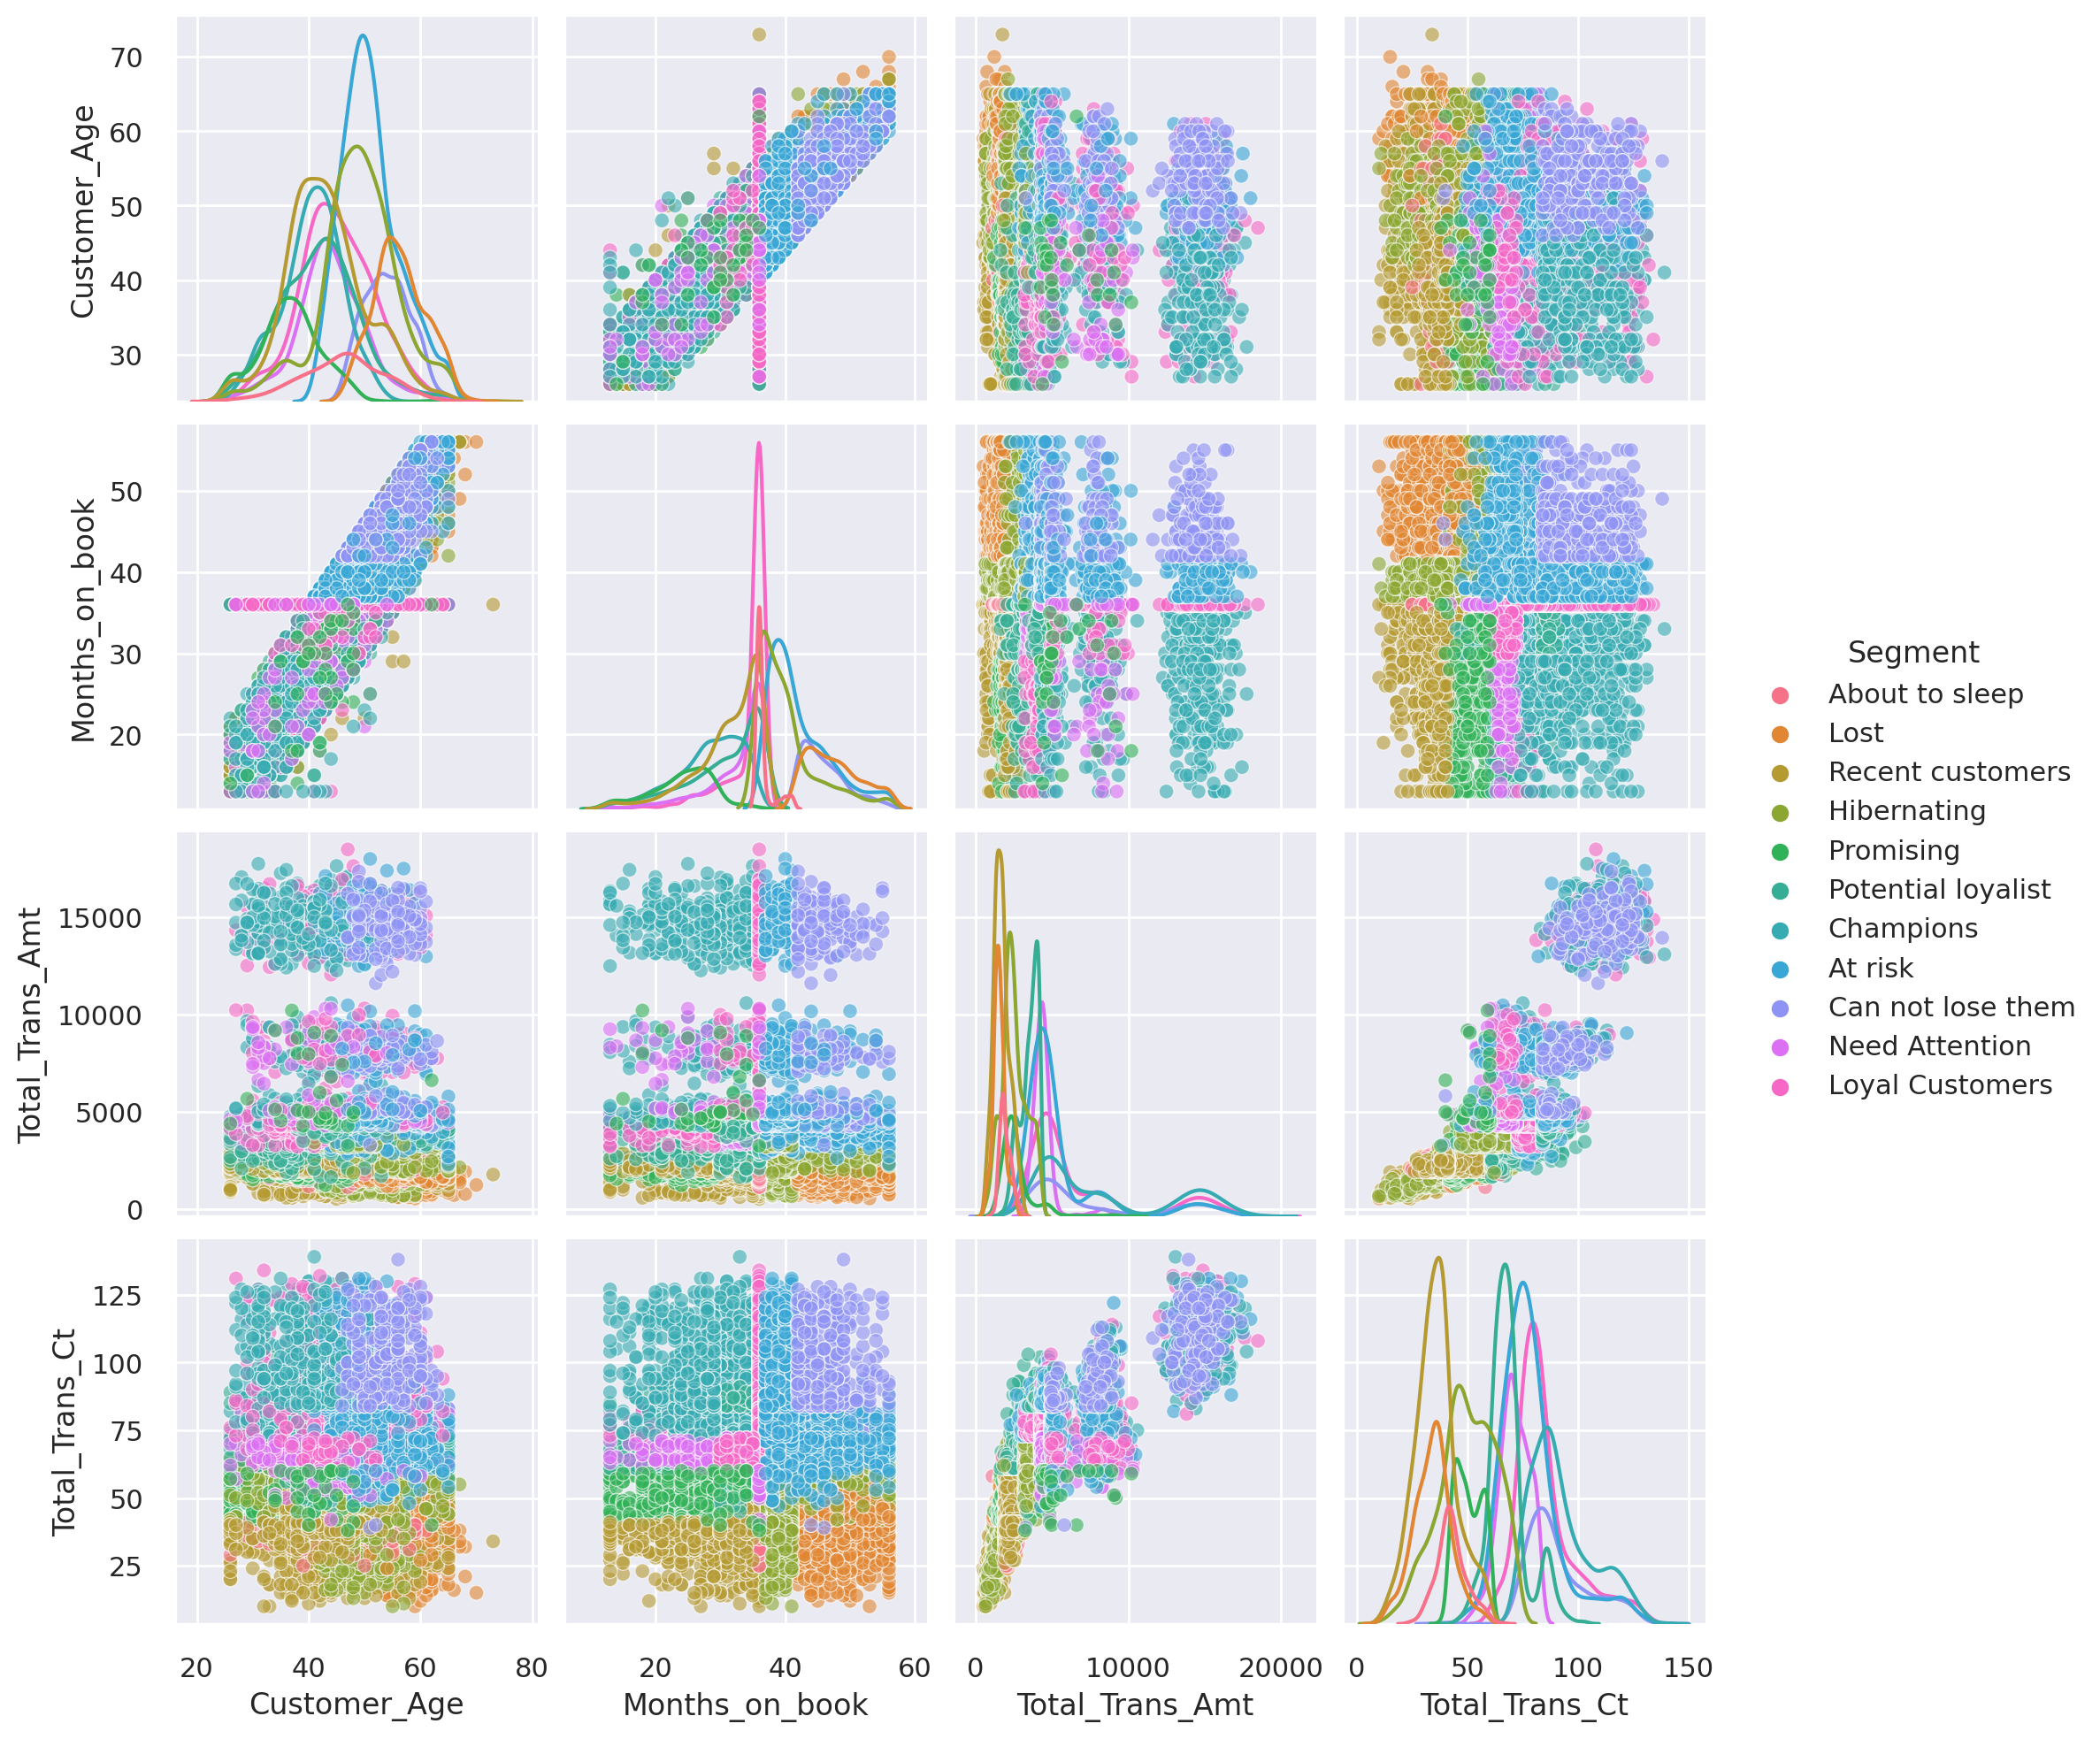

In [ ]:
sns.set(rc={'figure.dpi':200}) #focus on 8 9 10

# default: kind='scatter', diag_kind='auto'
sns.pairplot( data=df_demo,
              hue='Segment',
              plot_kws=dict(alpha=0.6),    # Set the non-diagonal plots
              diag_kws=dict(fill=False),   # Set the diagonal plots
           )

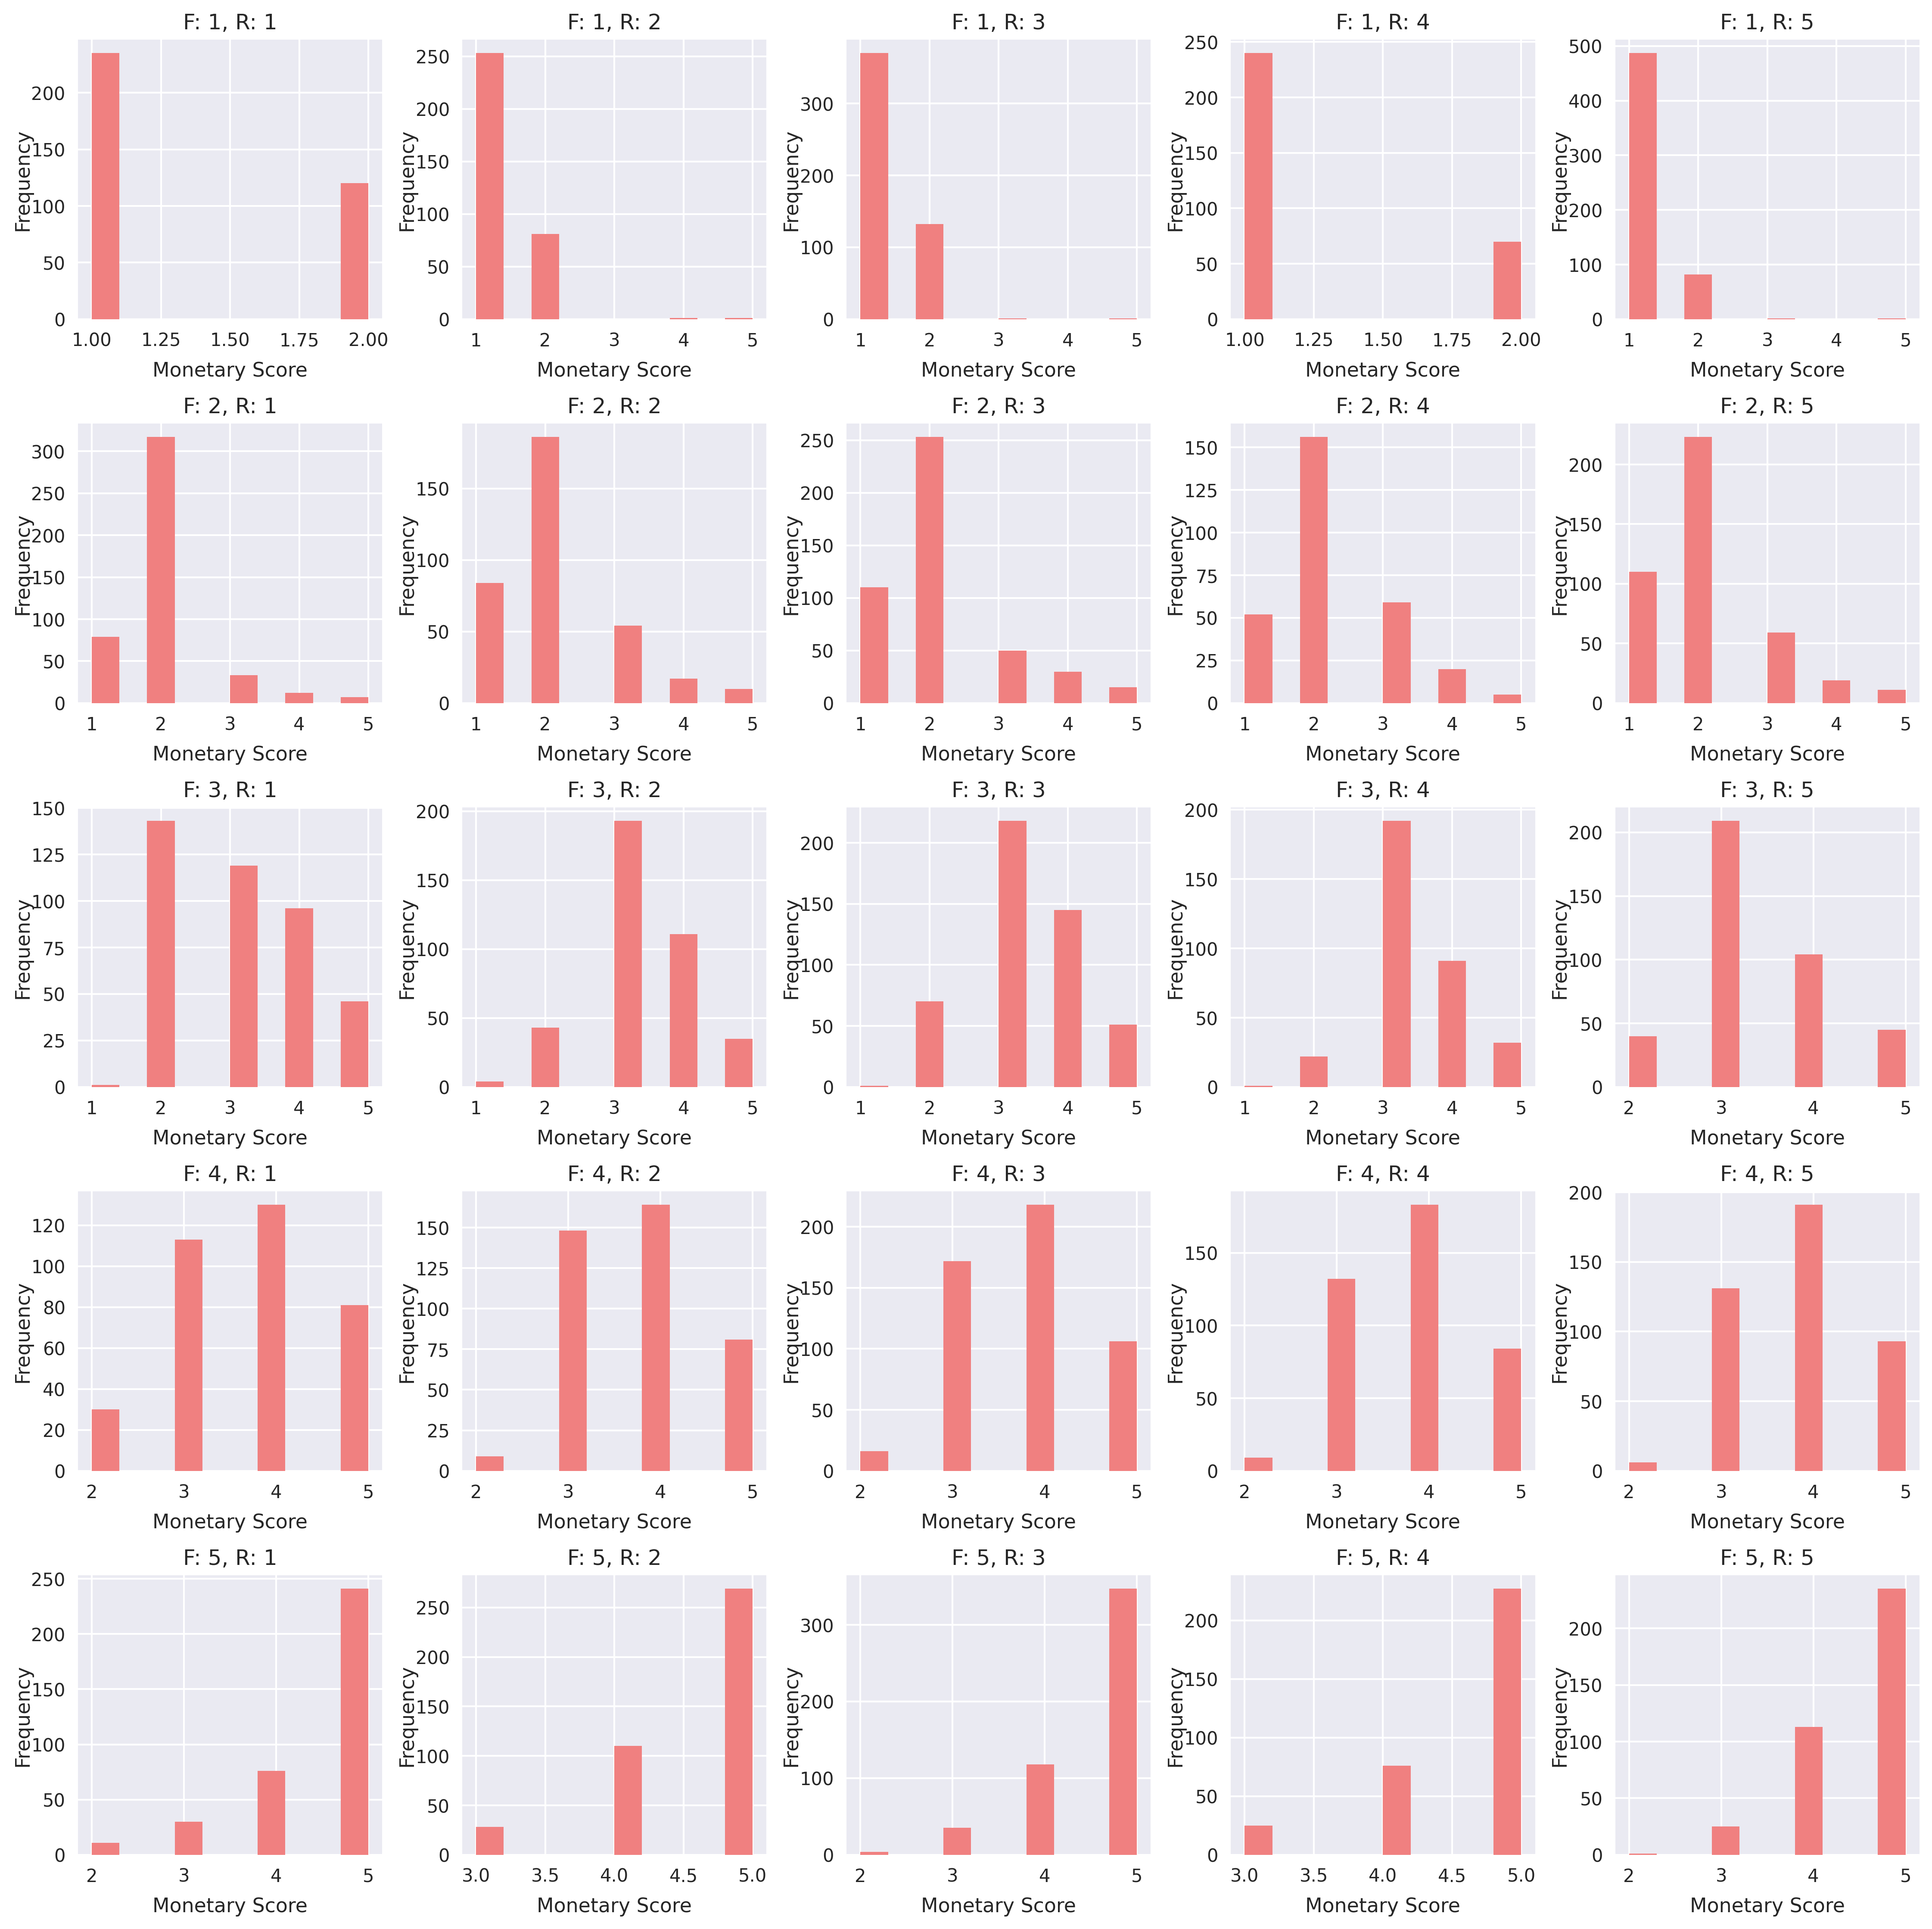

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have three lists of ranks: rank_R, rank_F, rank_M
rank_R = result['rank_R']
rank_F = result['rank_F']
rank_M = result['rank_M']

# Creating a 5x5 grid of subplots (25 plots in total)
fig, axs = plt.subplots(5, 5, figsize=(15, 15), dpi=300)

# Iterating over all possible combinations of frequency and recency scores
for i, freq_score in enumerate(np.unique(rank_F)):
    for j, re_score in enumerate(np.unique(rank_R)):
        # Filtering the data for the current combination of scores
        filtered_data = rank_M[(rank_F == freq_score) & (rank_R == re_score)]

        # Plotting the histogram on the corresponding subplot with a custom color
        axs[i, j].hist(filtered_data, bins=10, color='#F08080')

        # Setting the title for the subplot
        axs[i, j].set_title(f'F: {freq_score}, R: {re_score}')

        # Setting labels for x and y axes
        axs[i, j].set_xlabel('Monetary Score')
        axs[i, j].set_ylabel('Frequency')

        # Adjusting the spacing between subplots
        axs[i, j].xaxis.set_label_coords(0.5, -0.15)
        axs[i, j].yaxis.set_label_coords(-0.15, 0.5)

# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()
